[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/AyhamAlsuwi/Data-preprocessing/blob/main/Cars-EDA.ipynb)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [260]:
df = pd.read_csv('https://raw.githubusercontent.com/AyhamAlsuwi/Data-preprocessing/main/Cars.csv')

In [3]:

# Set the maximum number of columns to display
pd.set_option('display.max_columns', None) 

# Optional: If your column names are long, prevent them from wrapping
pd.set_option('display.expand_frame_repr', False)

pd.set_option('display.max_rows', 350)

In [262]:
df

,Year,Make,Model,Used/New,Price,ConsumerRating,ConsumerReviews,SellerType,SellerName,SellerRating,SellerReviews,StreetName,State,Zipcode,DealType,ComfortRating,InteriorDesignRating,PerformanceRating,ValueForMoneyRating,ExteriorStylingRating,ReliabilityRating,ExteriorColor,InteriorColor,Drivetrain,MinMPG,MaxMPG,FuelType,Transmission,Engine,VIN,Stock#,Mileage
0,2019,Toyota,Sienna SE,Used,"$39,998",4.6,45,Dealer,CarMax Murrieta - Now offering Curbside Pickup...,3.3,3,25560 Madison Ave Murrieta,CA,92562,Great,4.7,4.6,4.6,4.4,4.6,4.7,Red,Black,Front-wheel Drive,19,27,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,5TDXZ3DC2KS015402,22998646,29403
1,2018,Ford,F-150 Lariat,Used,"$49,985",4.8,817,Dealer,Giant Chevrolet,4.8,131,1001 S Ben Maddox Way Visalia,CA,93292,Good,4.9,4.8,4.8,4.6,4.8,4.7,Shadow Black,Black,Four-wheel Drive,19,24,Gasoline,10-Speed Automatic,3.5L V6 24V PDI DOHC Twin Turbo,1FTEW1EG2JFD44217,22418A,32929
2,2017,RAM,1500 Laramie,Used,"$41,860",4.7,495,Dealer,Gill Auto Group Madera,4.6,249,1100 S Madera Ave Madera,CA,93637,Good,4.8,4.7,4.8,4.6,4.8,4.7,Granite Crystal Clearcoat Metallic,Black,Four-wheel Drive,15,21,Gasoline,8-Speed Automatic,5.7L V8 16V MPFI OHV,1C6RR7VT5HS842283,NG277871G,23173
3,2021,Honda,Accord Sport SE,Used,"$28,500",5.0,36,Dealer,AutoSavvy Las Vegas,4.6,284,2121 E Sahara Ave Las Vegas,NV,89104,NaN,4.9,5.0,4.9,5.0,5.0,5.0,Gray,–,Front-wheel Drive,29,35,Gasoline,Automatic CVT,1.5L I4 16V GDI DOHC Turbo,1HGCV1F49MA038035,54237,10598
4,2020,Lexus,RX 350,Used,"$49,000",4.8,76,Dealer,Lexus of Henderson,4.8,4755,7737 Eastgate Rd Henderson,NV,89011,Good,4.9,4.8,4.8,4.7,4.8,4.9,Eminent White Pearl,Birch,Front-wheel Drive,20,27,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,2T2AZMAA8LC156270,HDT4181A,28137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9374,2019,Subaru,Crosstrek 2.0i Premium,Used,"$27,374",4.7,205,Dealer,Bertera Subaru of West Springfield,4.4,443,657 Riverdale St. West Springfield,MA,01089,Good,4.7,4.7,4.6,4.7,4.8,4.8,Quartz Blue Pearl,Gray,All-wheel Drive,27,33,Gasoline,Automatic CVT,2.0L H4 16V GDI DOHC,JF2GTADC4KH318032,220502A,15606
9375,2019,Audi,Q8 3.0T Premium,Used,"$61,998",4.8,27,Dealer,Autobahn USA Westborough,4.8,1789,88 Turnpike Road Westboro,MA,01581,Fair,4.9,4.8,4.8,4.6,5.0,4.9,Night Black,Black,All-wheel Drive,17,22,Hybrid,8-Speed Automatic,3.0L V6 24V GDI DOHC Turbo Hybrid,WA1AVAF14KD015389,AB4719,46855
9376,2017,Buick,Enclave Leather,Used,"$26,944",4.8,137,Dealer,Tulley Automotive Group,4.7,831,147 Daniel Webster Hwy Nashua,NH,03060,Good,4.9,4.8,4.7,4.6,4.9,4.8,Ebony Twilight Metallic,Ebony,All-wheel Drive,15,22,Gasoline,6-Speed Automatic,3.6L V6 24V GDI DOHC,5GAKVBKD4HJ190334,B221381B,62649
9377,2019,Subaru,Forester Premium,Used,"$28,568",4.7,279,Dealer,Ira Subaru,4.4,680,97 Andover St Danvers,MA,01923,Good,4.8,4.7,4.6,4.7,4.7,4.8,Crystal Black Silica,Black,All-wheel Drive,26,33,Gasoline,Automatic CVT,2.5L H4 16V GDI DOHC,JF2SKAGC9KH423450,KH423450,30760


In [264]:
df.head(15)

,Year,Make,Model,Used/New,Price,ConsumerRating,ConsumerReviews,SellerType,SellerName,SellerRating,SellerReviews,StreetName,State,Zipcode,DealType,ComfortRating,InteriorDesignRating,PerformanceRating,ValueForMoneyRating,ExteriorStylingRating,ReliabilityRating,ExteriorColor,InteriorColor,Drivetrain,MinMPG,MaxMPG,FuelType,Transmission,Engine,VIN,Stock#,Mileage
0,2019,Toyota,Sienna SE,Used,"$39,998",4.6,45,Dealer,CarMax Murrieta - Now offering Curbside Pickup...,3.3,3,25560 Madison Ave Murrieta,CA,92562,Great,4.7,4.6,4.6,4.4,4.6,4.7,Red,Black,Front-wheel Drive,19,27,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,5TDXZ3DC2KS015402,22998646,29403
1,2018,Ford,F-150 Lariat,Used,"$49,985",4.8,817,Dealer,Giant Chevrolet,4.8,131,1001 S Ben Maddox Way Visalia,CA,93292,Good,4.9,4.8,4.8,4.6,4.8,4.7,Shadow Black,Black,Four-wheel Drive,19,24,Gasoline,10-Speed Automatic,3.5L V6 24V PDI DOHC Twin Turbo,1FTEW1EG2JFD44217,22418A,32929
2,2017,RAM,1500 Laramie,Used,"$41,860",4.7,495,Dealer,Gill Auto Group Madera,4.6,249,1100 S Madera Ave Madera,CA,93637,Good,4.8,4.7,4.8,4.6,4.8,4.7,Granite Crystal Clearcoat Metallic,Black,Four-wheel Drive,15,21,Gasoline,8-Speed Automatic,5.7L V8 16V MPFI OHV,1C6RR7VT5HS842283,NG277871G,23173
3,2021,Honda,Accord Sport SE,Used,"$28,500",5.0,36,Dealer,AutoSavvy Las Vegas,4.6,284,2121 E Sahara Ave Las Vegas,NV,89104,NaN,4.9,5.0,4.9,5.0,5.0,5.0,Gray,–,Front-wheel Drive,29,35,Gasoline,Automatic CVT,1.5L I4 16V GDI DOHC Turbo,1HGCV1F49MA038035,54237,10598
4,2020,Lexus,RX 350,Used,"$49,000",4.8,76,Dealer,Lexus of Henderson,4.8,4755,7737 Eastgate Rd Henderson,NV,89011,Good,4.9,4.8,4.8,4.7,4.8,4.9,Eminent White Pearl,Birch,Front-wheel Drive,20,27,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,2T2AZMAA8LC156270,HDT4181A,28137
5,2012,Toyota,4Runner SR5,Used,"$23,541",4.7,34,Dealer,AutoNation Toyota Hayward,4.4,1071,24773 Mission Blvd Hayward,CA,94544,Fair,4.7,4.6,4.4,4.6,4.9,4.9,Black,–,Rear-wheel Drive,17,23,Gasoline,5-Speed Automatic,4.0L V6 24V MPFI DOHC,JTEZU5JR3C5043790,C5043790,105469
6,2017,Honda,HR-V LX,Used,"$20,995",4.6,200,Dealer,Downtown Toyota-Subaru of Oakland,4.4,2695,4145 Broadway Oakland,CA,94611,Great,4.6,4.4,4.4,4.5,4.7,4.8,Modern Steel Metallic,Black,Front-wheel Drive,28,34,Gasoline,Automatic CVT,1.8L I4 16V MPFI SOHC,3CZRU5H32HG703897,T1480,10458
7,2014,Mercedes-Benz,E-Class E 350,Used,"$18,985",4.8,176,Dealer,Downtown Toyota-Subaru of Oakland,4.4,2695,4145 Broadway Oakland,CA,94611,Great,4.9,4.8,4.8,4.6,4.9,4.8,Lunar Blue Metallic,Saffron,Rear-wheel Drive,21,30,Gasoline,7-Speed Automatic,3.5L V6 24V GDI DOHC,WDDHF5KB3EA778099,224922A,58157
8,2021,Honda,Pilot Touring 8-Passenger,Used,"$44,299",4.8,63,Dealer,EchoPark Automotive Phoenix,4.9,237,10555 West Papago Freeway Avondale,AZ,85323,Good,4.9,4.7,4.8,4.7,4.7,4.8,Platinum White Pearl,Beige,All-wheel Drive,19,26,Gasoline,9-Speed Automatic,3.5L V6 24V GDI SOHC,5FNYF6H90MB052856,YMB052856,14445
9,2020,Dodge,Charger Scat Pack,Dodge Certified,"$46,773",4.8,56,Dealer,Bill Luke Chrysler Jeep Dodge RAM,4.3,1366,2425 W Camelback Rd Phoenix,AZ,85015,Good,4.9,4.8,4.9,4.7,4.9,4.9,Triple Nickel Clearcoat,Black,Rear-wheel Drive,15,24,Gasoline,8-Speed Automatic,6.4L V8 16V MPFI OHV,2C3CDXGJ8LH157532,CBY705,25642


In [6]:
df.tail(10)

,Year,Make,Model,Used/New,Price,ConsumerRating,ConsumerReviews,SellerType,SellerName,SellerRating,SellerReviews,StreetName,State,Zipcode,DealType,ComfortRating,InteriorDesignRating,PerformanceRating,ValueForMoneyRating,ExteriorStylingRating,ReliabilityRating,ExteriorColor,InteriorColor,Drivetrain,MinMPG,MaxMPG,FuelType,Transmission,Engine,VIN,Stock#,Mileage
9369,2019,Dodge,Durango GT,Used,"$35,500",4.7,61,Dealer,Eastchester Chrysler Jeep Dodge RAM,4.4,6302,4007 Boston Rd Bronx,NY,10466,Great,4.8,4.7,4.7,4.6,4.7,4.6,Octane Red Pearlcoat,Black,All-wheel Drive,18,25,Gasoline,8-Speed Automatic,3.6L V6 24V MPFI DOHC,1C4RDJDG0KC803725,EUKC803725,17069
9370,2019,Honda,CR-V EX-L,Used,"$33,277",4.8,540,Dealer,Millennium Honda,4.7,4705,286 N Franklin St Hempstead,NY,11550,Good,4.8,4.8,4.7,4.7,4.8,4.8,Platinum White Pearl,Black,All-wheel Drive,27,33,Gasoline,Automatic CVT,1.5L I4 16V GDI DOHC Turbo,7FARW2H81KE025123,U34582T,18025
9371,2019,Subaru,Crosstrek 2.0i Limited,Used,"$30,000",4.7,205,Dealer,Garavel Subaru,4.9,5447,10 Tindall Ave Norwalk,CT,06851,Good,4.7,4.7,4.6,4.7,4.8,4.8,Crystal White Pearl,Gray,All-wheel Drive,27,33,Gasoline,Automatic CVT,2.0L H4 16V GDI DOHC,JF2GTAMC0K8356082,S22-0526A,15306
9372,2019,Ford,Edge Titanium,Used,"$31,985",4.7,193,Dealer,Ford Lincoln of Smithtown,4.7,1232,440 Middle Country Rd St James,NY,11780,Great,4.8,4.7,4.7,4.6,4.8,4.7,White Platinum,Ebony,All-wheel Drive,21,28,Gasoline,8-Speed Automatic,2.0L I4 16V GDI DOHC Turbo,2FMPK4K99KBB49872,U13246,23016
9373,2019,Honda,CR-V EX-L,Used,"$31,999",4.8,540,Dealer,Hoffman Honda,4.8,1917,40 Albany Tpke West Simsbury,CT,06092,Good,4.8,4.8,4.7,4.7,4.8,4.8,Obsidian Blue Pearl,–,All-wheel Drive,27,33,Gasoline,Automatic CVT,1.5L I4 16V GDI DOHC Turbo,2HKRW2H87KH643043,10553HB,44481
9374,2019,Subaru,Crosstrek 2.0i Premium,Used,"$27,374",4.7,205,Dealer,Bertera Subaru of West Springfield,4.4,443,657 Riverdale St. West Springfield,MA,01089,Good,4.7,4.7,4.6,4.7,4.8,4.8,Quartz Blue Pearl,Gray,All-wheel Drive,27,33,Gasoline,Automatic CVT,2.0L H4 16V GDI DOHC,JF2GTADC4KH318032,220502A,15606
9375,2019,Audi,Q8 3.0T Premium,Used,"$61,998",4.8,27,Dealer,Autobahn USA Westborough,4.8,1789,88 Turnpike Road Westboro,MA,01581,Fair,4.9,4.8,4.8,4.6,5.0,4.9,Night Black,Black,All-wheel Drive,17,22,Hybrid,8-Speed Automatic,3.0L V6 24V GDI DOHC Turbo Hybrid,WA1AVAF14KD015389,AB4719,46855
9376,2017,Buick,Enclave Leather,Used,"$26,944",4.8,137,Dealer,Tulley Automotive Group,4.7,831,147 Daniel Webster Hwy Nashua,NH,03060,Good,4.9,4.8,4.7,4.6,4.9,4.8,Ebony Twilight Metallic,Ebony,All-wheel Drive,15,22,Gasoline,6-Speed Automatic,3.6L V6 24V GDI DOHC,5GAKVBKD4HJ190334,B221381B,62649
9377,2019,Subaru,Forester Premium,Used,"$28,568",4.7,279,Dealer,Ira Subaru,4.4,680,97 Andover St Danvers,MA,01923,Good,4.8,4.7,4.6,4.7,4.7,4.8,Crystal Black Silica,Black,All-wheel Drive,26,33,Gasoline,Automatic CVT,2.5L H4 16V GDI DOHC,JF2SKAGC9KH423450,KH423450,30760
9378,2019,Hyundai,Santa Fe Ultimate 2.4,Used,"$32,091",4.8,204,Dealer,Route 44 Hyundai,4.4,1105,1094 New State Hwy Raynham,MA,02767,Good,4.9,4.9,4.6,4.8,4.9,4.8,Twilight Black,Black,All-wheel Drive,21,27,Gasoline,8-Speed Automatic,2.4L I4 16V GDI DOHC,5NMS5CAD1KH002128,H48345,41645


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9379 entries, 0 to 9378
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   9379 non-null   int64  
 1   Make                   9379 non-null   object 
 2   Model                  9379 non-null   object 
 3   Used/New               9379 non-null   object 
 4   Price                  9379 non-null   object 
 5   ConsumerRating         9379 non-null   float64
 6   ConsumerReviews        9379 non-null   int64  
 7   SellerType             9379 non-null   object 
 8   SellerName             9379 non-null   object 
 9   SellerRating           9379 non-null   float64
 10  SellerReviews          9379 non-null   int64  
 11  StreetName             9379 non-null   object 
 12  State                  9379 non-null   object 
 13  Zipcode                9379 non-null   object 
 14  DealType               9157 non-null   object 
 15  Comf

In [8]:
df.describe()

,Year,ConsumerRating,ConsumerReviews,SellerRating,SellerReviews,ComfortRating,InteriorDesignRating,PerformanceRating,ValueForMoneyRating,ExteriorStylingRating,ReliabilityRating,MinMPG,MaxMPG,Mileage
count,9379.000000,9379.000000,9379.000000,9379.000000,9379.000000,9379.000000,9379.000000,9379.000000,9379.000000,9379.000000,9379.000000,9379.000000,9379.000000,9379.000000
mean,2018.721719,4.702825,133.187014,4.412571,984.089988,4.771895,4.727391,4.696290,4.537083,4.782194,4.681746,22.755411,29.216548,37463.023350
std,2.221708,0.240795,154.985640,0.626258,1609.039864,0.217822,0.194391,0.253664,0.338098,0.171537,0.368161,14.812869,12.809783,24970.342569
min,2001.000000,2.500000,1.000000,1.000000,1.000000,3.000000,2.800000,1.000000,1.000000,3.000000,1.000000,0.000000,0.000000,121.000000
25%,2018.000000,4.700000,30.000000,4.300000,112.000000,4.700000,4.700000,4.600000,4.500000,4.700000,4.600000,18.000000,25.000000,18666.500000
50%,2019.000000,4.800000,75.000000,4.600000,542.000000,4.800000,4.800000,4.700000,4.600000,4.800000,4.800000,20.000000,27.000000,32907.000000
75%,2020.000000,4.800000,182.000000,4.800000,1272.000000,4.900000,4.800000,4.800000,4.700000,4.900000,4.900000,24.000000,31.000000,47698.000000
max,2022.000000,5.000000,817.000000,5.000000,27824.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,150.000000,133.000000,234114.000000


In [9]:
df.describe(include='O')

,Make,Model,Used/New,Price,SellerType,SellerName,StreetName,State,Zipcode,DealType,ExteriorColor,InteriorColor,Drivetrain,FuelType,Transmission,Engine,VIN,Stock#
count,9379,9379,9379,9379,9379,9379,9379,9379,9379,9157,9379,9379,9379,9379,9379,9379,9379,9379
unique,41,1304,26,5064,2,3971,3967,59,2163,3,949,374,10,13,93,326,8474,8431
top,BMW,Grand Cherokee Limited,Used,"$29,995",Dealer,EchoPark Automotive Greenville,2930 Laurens Rd Greenville,TX,76051,Good,Black,Black,All-wheel Drive,Gasoline,8-Speed Automatic,2.0L I4 16V GDI DOHC Turbo,JHLRW2H8XKX023259,–
freq,944,266,7900,36,9339,36,36,1225,69,5524,897,3758,4476,8905,3202,1629,3,40


## Handling missing values

In [11]:
df.isnull().sum()

Year                       0
Make                       0
Model                      0
Used/New                   0
Price                      0
ConsumerRating             0
ConsumerReviews            0
SellerType                 0
SellerName                 0
SellerRating               0
SellerReviews              0
StreetName                 0
State                      0
Zipcode                    0
DealType                 222
ComfortRating              0
InteriorDesignRating       0
PerformanceRating          0
ValueForMoneyRating        0
ExteriorStylingRating      0
ReliabilityRating          0
ExteriorColor              0
InteriorColor              0
Drivetrain                 0
MinMPG                     0
MaxMPG                     0
FuelType                   0
Transmission               0
Engine                     0
VIN                        0
Stock#                     0
Mileage                    0
dtype: int64

In [12]:
df['DealType'] = df['DealType'].fillna(df['DealType'].mode()[0])

In [13]:
df.isnull().sum().sum()

0

## Handling wrong values and some feature engineering

#### MinMPG & MaxMPG

In [16]:
# min > max ?? -> must fix
df.loc[df['MinMPG'] > df['MaxMPG'] ,'Year'].count()

207

In [17]:
df.loc[df['MinMPG']>df['MaxMPG'] , ['MinMPG' , 'MaxMPG']] = df.loc[df['MinMPG']>df['MaxMPG'] , ['MaxMPG' , 'MinMPG']].values

In [18]:
df.loc[df['MinMPG'] > df['MaxMPG'] ,'Year'].count()

0

In [19]:
# MinMPG == 0 and MaxMPG == 0 are missing values (impossible to be 0) , must fix 
df.loc[(df['MinMPG'] == 0 )| (df['MaxMPG'] == 0) , 'Year'].count()

44

In [20]:
df.loc[(df['MinMPG'] == 0 )| (df['MaxMPG'] == 0),['Year', 'Make', 'Model'] ].value_counts()

Year  Make           Model                          
2021  Tesla          Model Y Performance                4
2022  Tesla          Model 3 Long Range                 3
2020  Ford           Transit-250 Base                   3
2021  Tesla          Model 3 Performance                2
2018  GMC            Sierra 2500 Denali                 2
      INFINITI       QX30 Premium                       2
2020  Tesla          Model 3 Performance                2
      GMC            Sierra 2500 Denali                 2
2019  Mercedes-Benz  GLC 350e Base 4MATIC               2
2008  Chevrolet      Silverado 2500 LTZ H/D Crew Cab    1
2019  Lincoln        Navigator L Reserve                1
2021  Tesla          Model Y Long Range                 1
                     Model 3 Long Range                 1
      BMW            X5 PHEV xDrive45e                  1
2020  Tesla          Model Y Long Range                 1
      GMC            Sierra 3500 Denali                 1
2019  GMC          

In [21]:
df['MinMPG'] = df['MinMPG'].replace(0 , np.nan)
df['MaxMPG'] = df['MaxMPG'].replace(0 , np.nan)

In [22]:
df['MinMPG'] = df.groupby(['Year' , 'Model' , 'Drivetrain'] )['MinMPG'].transform(lambda x : x.fillna(x.median()))
df['MaxMPG'] = df.groupby(['Year' , 'Model' , 'Drivetrain' ])['MaxMPG'].transform(lambda x : x.fillna(x.median()))

In [23]:
df['MinMPG'] = df.groupby(['Make' ,'Model' ])['MinMPG'].transform(lambda x : x.fillna(x.median()))
df['MaxMPG'] = df.groupby(['Make', 'Model' ])['MaxMPG'].transform(lambda x : x.fillna(x.median()))

In [24]:
df['MinMPG'].isna().sum()

16

In [25]:
df['MinMPG'] = df['MinMPG'].fillna(df['MinMPG'].median())
df['MaxMPG'] = df['MaxMPG'].fillna(df['MaxMPG'].median())

In [26]:
df['MinMPG'].isna().sum()

0

#### Used/New

In [28]:
# can be converted to 0 = used and 1 = Certified instead of all these (company name certified) and rename it
df['Used/New'].value_counts()

Used/New
Used                       7900
BMW Certified               247
Mercedes-Benz Certified     223
Honda Certified             208
Toyota Certified            153
Cadillac Certified          105
Ford Certified               71
Subaru Certified             58
Jeep Certified               55
Nissan Certified             50
Acura Certified              47
Chevrolet Certified          40
INFINITI Certified           34
Kia Certified                34
Volvo Certified              33
Porsche Certified            25
RAM Certified                24
Buick Certified              20
Volkswagen Certified         17
GMC Certified                13
Dodge Certified              10
Alfa Romeo Certified          7
Bentley Certified             2
MINI Certified                1
Ferrari Certified             1
Maserati Certified            1
Name: count, dtype: int64

In [29]:
df['Used/New']= np.where(df['Used/New'] == 'Used' , 0 , 1)

In [30]:
df['Used/New'].value_counts()

Used/New
0    7900
1    1479
Name: count, dtype: int64

In [31]:
df.rename(columns ={'Used/New':'Used/Certified'} , inplace=True)

In [32]:
df['Used/Certified'].value_counts()

Used/Certified
0    7900
1    1479
Name: count, dtype: int64

#### Price (the target)

In [34]:
#missing values in the target feature, must drop them
df.loc[~(df['Price'].str.startswith('$')) , 'Price'].value_counts()

Price
Not Priced    5
Name: count, dtype: int64

In [35]:
df['Price'] = df['Price'].replace('Not Priced' , np.nan)

In [36]:
df.dropna(subset='Price' , inplace=True)

In [37]:
df['Price'].isna().sum()

0

In [38]:
df.shape

(9374, 32)

In [39]:
# price is treated as string, it should be a number.
df['Price']

0       $39,998
1       $49,985
2       $41,860
3       $28,500
4       $49,000
         ...   
9374    $27,374
9375    $61,998
9376    $26,944
9377    $28,568
9378    $32,091
Name: Price, Length: 9374, dtype: object

In [40]:
# reformating the string to be like a number
df['Price'] = df['Price'].str.replace('$','')
df['Price'] = df['Price'].str.replace(',','')

In [41]:
df['Price'] = pd.to_numeric(df['Price'])

In [42]:
df['Price'].dtype

dtype('int64')

In [43]:
# no other null
(df['Price'] == 0).sum()

0

#### Drivetrain

In [45]:
# ther are only 4 types of Drivetrain, so these must be fixed.
df['Drivetrain'].value_counts()

Drivetrain
All-wheel Drive      4474
Front-wheel Drive    2326
Four-wheel Drive     1549
Rear-wheel Drive      915
FWD                    36
AWD                    34
4WD                    20
RWD                    12
–                       7
Front Wheel Drive       1
Name: count, dtype: int64

In [46]:
Drivetrain_mapper = {'Front-wheel Drive':'FWD' , 'All-wheel Drive':'AWD' ,'Four-wheel Drive':'4WD',
                    'Rear-wheel Drive':'RWD', 'Front Wheel Drive':'FWD' , '–':np.nan}
df['Drivetrain'] = df['Drivetrain'].replace(Drivetrain_mapper)

In [47]:
df['Drivetrain'].isna().sum()

7

In [48]:
df['Drivetrain'] = df.groupby('Model')['Drivetrain'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17660\2587716408.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Drivetrain'] = df.groupby('Model')['Drivetrain'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))


In [49]:
df['Drivetrain'].isna().sum()

1

In [50]:
df['Drivetrain'] = df.groupby('Make')['Drivetrain'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))

In [51]:
df['Drivetrain'].isna().sum()

0

In [52]:
df['Drivetrain'].value_counts()

Drivetrain
AWD    4512
FWD    2363
4WD    1572
RWD     927
Name: count, dtype: int64

#### Fuel Type

In [54]:
# there are many names for same category, they should be combined
df['FuelType'].value_counts()

FuelType
Gasoline                         8900
Electric                          162
E85 Flex Fuel                     121
Hybrid                             69
Diesel                             45
Gasoline Fuel                      30
–                                  30
Electric Fuel System                5
Gasoline/Mild Electric Hybrid       5
Flex Fuel Capability                3
Flexible Fuel                       2
Plug-In Electric/Gas                1
Diesel Fuel                         1
Name: count, dtype: int64

In [55]:
FuelType_mapper = {'Gasoline Fuel':'Gasoline' ,'Electric Fuel System':'Electric' , 'Flex Fuel Capability':'E85 Flex Fuel',
                   'Flexible Fuel':'E85 Flex Fuel','Diesel Fuel':'Diesel' , '–':np.nan }
df['FuelType'] = df['FuelType'].replace(FuelType_mapper)

In [56]:
df[(df['Make']=='Tesla') & (df['FuelType'] != 'Electric')]

,Year,Make,Model,Used/Certified,Price,ConsumerRating,ConsumerReviews,SellerType,SellerName,SellerRating,SellerReviews,StreetName,State,Zipcode,DealType,ComfortRating,InteriorDesignRating,PerformanceRating,ValueForMoneyRating,ExteriorStylingRating,ReliabilityRating,ExteriorColor,InteriorColor,Drivetrain,MinMPG,MaxMPG,FuelType,Transmission,Engine,VIN,Stock#,Mileage
203,2021,Tesla,Model 3 Performance,0,65786,3.0,1,Dealer,Brandon Tomes Subaru,4.5,62,1100 S Central Expy McKinney,TX,75070,Good,3.0,4.0,5.0,2.0,4.0,1.0,Pearl White Multi,White / Black,AWD,107.0,118.0,Gasoline,1-Speed Automatic,10 Cylinder,5YJ3E1EC1MF869804,1S17267,32600
427,2020,Tesla,Model 3 Performance,0,64900,4.3,16,Dealer,Sanford INFINITI,4.9,1001,995 Rinehart Road Sanford,FL,32771,Good,4.6,4.4,4.6,4.0,4.2,4.4,Deep Blue Metallic,White / Black,AWD,107.0,118.0,NaN,1-Speed Automatic,Electric,5YJ3E1EC8LF669680,NP669680,11733
620,2020,Tesla,Model 3 Performance,0,60400,4.3,16,Dealer,Leonardtown Ford,4.6,135,26322 Point Lookout Rd Leonardtown,MD,20650,Good,4.6,4.4,4.6,4.0,4.2,4.4,Black,Black,AWD,107.0,118.0,NaN,1-Speed Automatic,0.0,5YJ3E1EC5LF602874,602874,46021
1526,2021,Tesla,Model 3 Standard Range Plus,0,56472,3.0,1,Dealer,Federico Dodge Chrysler Jeep RAM,4.9,743,1875 E Edwardsville Rd Wood River,IL,62095,Good,3.0,4.0,5.0,2.0,4.0,1.0,Black,Black,RWD,133.0,150.0,NaN,1-Speed Automatic,Electric,5YJ3E1EA2MF854002,10398,15595
1610,2021,Tesla,Model 3 Performance,0,64750,3.0,1,Dealer,eCarOne,4.9,1826,555 North East Loop 820 Hurst,TX,76053,Good,3.0,4.0,5.0,2.0,4.0,1.0,Pearl White Multi,White / Black,AWD,107.0,118.0,Gasoline,1-Speed Automatic,10 Cylinder,5YJ3E1EC2MF054477,PMF054477,14055
1671,2021,Tesla,Model 3 Long Range,0,61921,3.0,1,Dealer,Antwerpen Chevrolet,5.0,5,6110 Sykesville Road Eldersburg,MD,21784,Good,3.0,4.0,5.0,2.0,4.0,1.0,Black,Black,AWD,127.0,141.0,NaN,1-Speed Automatic,0 0.0,5YJ3E1EB9MF979541,9045TC,19979
1789,2020,Tesla,Model 3 Long Range,0,52488,4.3,16,Dealer,Tracy Volkswagen,3.5,26,2605 Auto Plaza Way Tracy,CA,95304,Great,4.6,4.4,4.6,4.0,4.2,4.4,Black,White / Black,AWD,116.0,124.0,Gasoline,1-Speed Automatic,10 Cylinder,5YJ3E1EB9LF638946,P16956A,49666
2415,2021,Tesla,Model 3 Standard Range Plus,0,57982,3.0,1,Dealer,Brandon Hyundai,4.3,5425,9915 East Adamo Drive Tampa,FL,33619,Great,3.0,4.0,5.0,2.0,4.0,1.0,Pearl White,Black,RWD,133.0,150.0,NaN,1-Speed Automatic,Electric,5YJ3E1EAXMF017787,A226894A,13683
2481,2020,Tesla,Model 3 Long Range,0,59995,4.3,16,Dealer,Highline Auto Sales,4.6,327,555 Executive Dr Willowbrook,IL,60527,Great,4.6,4.4,4.6,4.0,4.2,4.4,Pearl White Multi,White / Black,AWD,116.0,124.0,NaN,1-Speed Automatic,–,5YJ3E1EB3LF525400,HL6224,15514
2543,2020,Tesla,Model 3 Performance,0,64698,4.3,16,Dealer,Livermore Ford Lincoln,4.5,1152,2266 Kitty Hawk Rd Livermore,CA,94551,Good,4.6,4.4,4.6,4.0,4.2,4.4,Pearl White Multi,Black,AWD,107.0,118.0,Gasoline,1-Speed Automatic,10 Cylinder,5YJ3E1EC6LF714325,P9288,23968


In [57]:
#there were tesla with gasoline!
df.loc[df['Make'] == 'Tesla' , 'FuelType'] = 'Electric'

In [58]:
df['FuelType'].isna().sum()

8

In [59]:
df['FuelType'] = df.groupby([ 'Year','Model'])['FuelType'].transform(lambda x : x.fillna(x.mode()[0] if not x.mode().empty else np.nan))

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17660\4261717684.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['FuelType'] = df.groupby([ 'Year','Model'])['FuelType'].transform(lambda x : x.fillna(x.mode()[0] if not x.mode().empty else np.nan))


In [60]:
df['FuelType'] = df.groupby([ 'Year','Make'])['FuelType'].transform(lambda x : x.fillna(x.mode()[0] if not x.mode().empty else np.nan))

In [61]:
df['FuelType'].isna().sum()

0

In [62]:
df['FuelType'].value_counts()

FuelType
Gasoline                         8922
Electric                          205
E85 Flex Fuel                     126
Hybrid                             69
Diesel                             46
Gasoline/Mild Electric Hybrid       5
Plug-In Electric/Gas                1
Name: count, dtype: int64

#### Transmission

In [64]:
# there are many synonyms, So I will create a new feature based on these to unite them in the correct categories
df['Transmission'].value_counts()

Transmission
8-Speed Automatic                                     3201
6-Speed Automatic                                     1676
Automatic CVT                                         1291
9-Speed Automatic                                     1014
10-Speed Automatic                                     448
Automatic                                              377
7-Speed Automatic with Auto-Shift                      368
7-Speed Automatic                                      245
1-Speed Automatic                                      180
5-Speed Automatic                                      162
8-Speed Automatic with Auto-Shift                       90
Variable                                                32
4-Speed Automatic                                       30
6-Speed Manual                                          23
8-SPEED A/T                                             21
6-SPEED A/T                                             20
A/T                                        

In [65]:
df.loc[df['Transmission'].str.contains('automatic|A/T|Auto',case=False),'Transmission'] = 'Automatic'

In [66]:
df.loc[df['Transmission'].str.contains('CVT|Variable',case=False),'Transmission'] = 'CVT'

In [67]:
df.loc[df['Transmission'].str.contains('Manual|M/T',case=False),'Transmission'] = 'Manual'

In [68]:
df.loc[df['FuelType'] == 'Electric' , 'Transmission'] = 'Single-speed' 

In [69]:
df.loc[~(df['Transmission'].str.contains('Automatic|CVT|Manual|Single-speed',case=False)),'Transmission'] = np.nan

In [70]:
df['Transmission'].value_counts()

Transmission
Automatic       9063
Single-speed     205
CVT               52
Manual            39
Name: count, dtype: int64

In [71]:
df['Transmission'].isna().sum()

15

In [72]:
df['Transmission'] = df.groupby([ 'Year','Model'])['Transmission'].transform(lambda x : x.fillna(x.mode()[0] if not x.mode().empty else np.nan))

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17660\654620546.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Transmission'] = df.groupby([ 'Year','Model'])['Transmission'].transform(lambda x : x.fillna(x.mode()[0] if not x.mode().empty else np.nan))


In [73]:
df['Transmission'].isna().sum()

9

In [74]:
df['Transmission'] = df.groupby([ 'Year','Make'])['Transmission'].transform(lambda x : x.fillna(x.mode()[0] if not x.mode().empty else np.nan))

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17660\4227246286.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Transmission'] = df.groupby([ 'Year','Make'])['Transmission'].transform(lambda x : x.fillna(x.mode()[0] if not x.mode().empty else np.nan))


In [75]:
df['Transmission'].isna().sum()

2

In [76]:
df['Transmission'] = df.groupby([ 'Make'])['Transmission'].transform(lambda x : x.fillna(x.mode()[0] if not x.mode().empty else np.nan))

In [77]:
df['Transmission'].isna().sum()

0

In [78]:
# I can extract some features from this column which will be better for EDA  (this column is very complex)
df['Engine'].value_counts()

Engine
2.0L I4 16V GDI DOHC Turbo                                          1629
3.6L V6 24V MPFI DOHC                                                423
1.5L I4 16V GDI DOHC Turbo                                           422
3.0L I6 24V GDI DOHC Turbo                                           416
3.6L V6 24V GDI DOHC                                                 390
3.5L V6 24V PDI DOHC                                                 297
3.5L V6 24V GDI SOHC                                                 290
2.4L I4 16V GDI DOHC                                                 230
2.5L I4 16V PDI DOHC                                                 221
3.5L V6 24V GDI DOHC                                                 216
2.5L I4 16V MPFI DOHC                                                209
3.0L V6 24V GDI DOHC Twin Turbo                                      208
3.5L V6 24V MPFI DOHC                                                201
5.7L V8 16V MPFI OHV                        

#### Cylinders

In [80]:
df['Cylinders'] = df['Engine'].str.extract(r'(?i)([IVHW]-?\d+|\d+-?\s?Cyl)' ) 

In [81]:
df.loc[df['FuelType'] == 'Electric', 'Cylinders'] = 'Electric'

In [82]:
df['Cylinders'].isna().sum()

47

In [83]:
df['Cylinders'] = df.groupby([ 'Year','Model'])['Cylinders'].transform(lambda x : x.fillna(x.mode()[0] if not x.mode().empty else np.nan))

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17660\3909948085.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Cylinders'] = df.groupby([ 'Year','Model'])['Cylinders'].transform(lambda x : x.fillna(x.mode()[0] if not x.mode().empty else np.nan))


In [84]:
df['Cylinders'] = df.groupby([ 'Year','Make'])['Cylinders'].transform(lambda x : x.fillna(x.mode()[0] if not x.mode().empty else np.nan))

In [85]:
df['Cylinders'].isna().sum()

0

In [86]:
# it needs some fix, many values with the same meaning
df['Cylinders'].value_counts()

Cylinders
I4          3941
V6          3046
V8          1073
I6           455
H4           286
Electric     205
4 Cyl         96
I-4           78
V-6           48
H6            41
8 Cyl         33
I3            22
6 Cyl         10
I5             6
H-4            6
4-Cyl          5
V-8            5
V10            4
W12            3
I-6            3
V12            2
6-cyl          2
4-cyl          2
12 Cyl         1
I-5            1
Name: count, dtype: int64

In [87]:
CylMapper = {'4 Cyl':'I4' , 'I-4':'I4' , '4-Cyl':'I4' ,'4-cyl':'I4', 'V-6':'V6' , '6 Cyl':'V6' , '6-cyl':'V6',
               'I-6':'I6', '8 Cyl':'V8' , 'V-8':'V8' , 'H-4':'H4' , '10 Cyl':'V10' , '12 Cyl':'V12' , 'I-5':'I5' }
df['Cylinders'] = df['Cylinders'].replace(CylMapper)

In [88]:
df['Cylinders'].value_counts()

Cylinders
I4          4122
V6          3106
V8          1111
I6           458
H4           292
Electric     205
H6            41
I3            22
I5             7
V10            4
V12            3
W12            3
Name: count, dtype: int64

#### Turbo/Supercharged

In [90]:
df['Turbo/Supercharged'] = df['Engine'].str.extract(r'(?i)(Twin\s?Turbo|Turbo|Supercharged)')

In [91]:
df.loc[df['FuelType'] == 'Electric' , 'Turbo/Supercharged'] = 'Electric'

In [92]:
df.loc[df['Turbo/Supercharged'].isna() , 'Turbo/Supercharged'] = 'Not Charged'

In [93]:
df['Turbo/Supercharged'].value_counts()

Turbo/Supercharged
Not Charged     5298
Turbo           3176
Twin Turbo       595
Electric         205
Supercharged      99
turbo              1
Name: count, dtype: int64

In [94]:
df['Turbo/Supercharged'] = df['Turbo/Supercharged'].replace({'turbo':'Turbo'})

In [95]:
df['Turbo/Supercharged'].value_counts()

Turbo/Supercharged
Not Charged     5298
Turbo           3177
Twin Turbo       595
Electric         205
Supercharged      99
Name: count, dtype: int64

## Outliers detection and handling

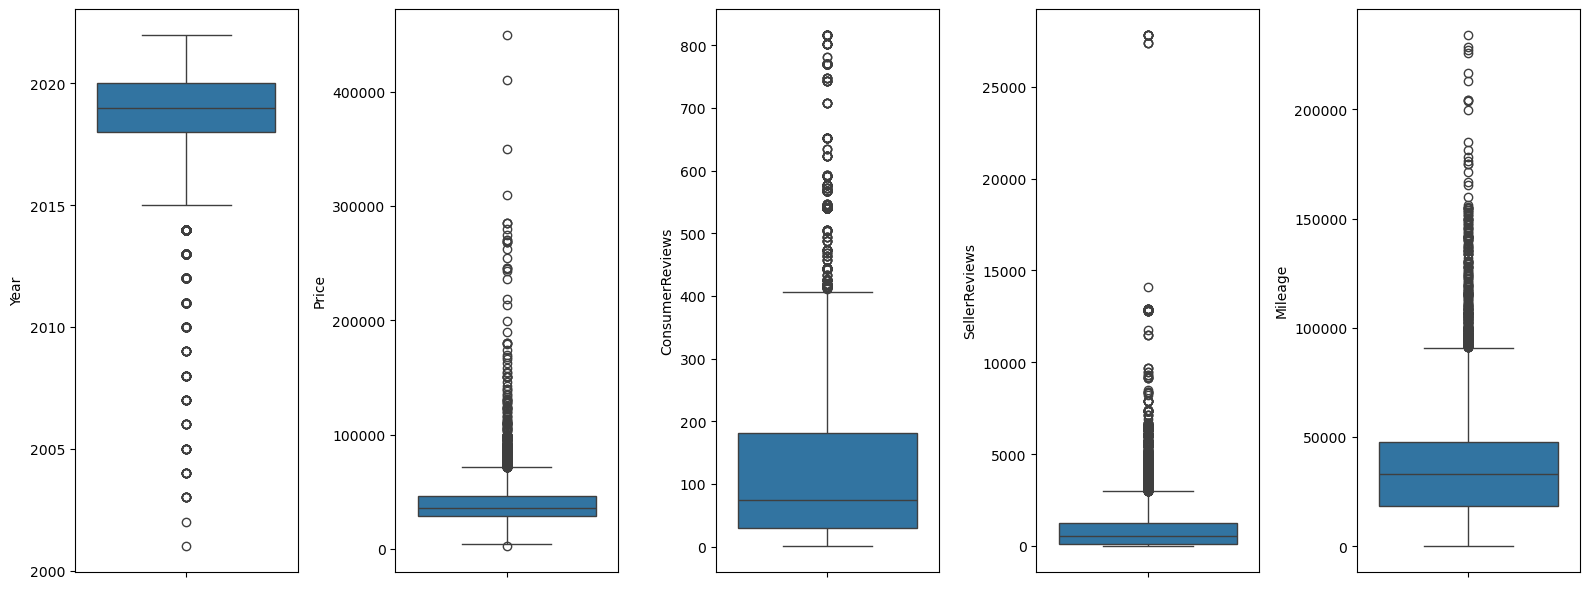

In [97]:
plt.figure(figsize = (16,6))

plt.subplot(1,5,1)
sns.boxplot(y = df['Year'])

plt.subplot(1,5,2)
sns.boxplot(y = df['Price'])

plt.subplot(1,5,3)
sns.boxplot(y = df['ConsumerReviews'])

plt.subplot(1,5,4)
sns.boxplot(y = df['SellerReviews'])

plt.subplot(1,5,5)
sns.boxplot(y = df['Mileage'])

plt.tight_layout();


In [98]:
# after cheching, the last two outliers are only the errors and I will drop them, the rest are acceptable
df.sort_values(by = 'Price').tail(15)

,Year,Make,Model,Used/Certified,Price,ConsumerRating,ConsumerReviews,SellerType,SellerName,SellerRating,SellerReviews,StreetName,State,Zipcode,DealType,ComfortRating,InteriorDesignRating,PerformanceRating,ValueForMoneyRating,ExteriorStylingRating,ReliabilityRating,ExteriorColor,InteriorColor,Drivetrain,MinMPG,MaxMPG,FuelType,Transmission,Engine,VIN,Stock#,Mileage,Cylinders,Turbo/Supercharged
635,2020,Lamborghini,Urus,0,262500,4.7,1,Dealer,Manhattan Motorcars Inc.,4.8,320,711 11th Ave New York,NY,10019,Good,4.0,5.0,5.0,5.0,5.0,4.0,Grigio Nimbus Metallic,Nero Ade,AWD,12.0,17.0,Gasoline,Automatic,4.0L V8 32V GDI DOHC Twin Turbo,ZPBUA1ZL0LLA07026,PO4181,25428,V8,Twin Turbo
9194,2021,Bentley,Continental GT V8,1,268285,3.3,1,Dealer,"Bentley, Maserati & Rolls-Royce Motor Cars by ...",3.5,11,3610 Thousand Oaks Blvd Westlake Village,CA,91362,Good,3.0,4.0,4.0,2.0,5.0,2.0,Glacier White,Hotspur,AWD,16.0,26.0,Gasoline,Automatic,4.0L V8 32V GDI DOHC Twin Turbo,SCBCG2ZG0MC087233,22B1036A,2794,V8,Twin Turbo
1681,2022,Porsche,911 Turbo,0,268699,4.9,1,Dealer,Kia of Riverdale,4.3,498,1 Windbeam Rd Riverdale,NJ,07457,Great,5.0,5.0,5.0,4.0,5.0,5.0,Chalk,Bordeaux Red,AWD,15.0,20.0,Gasoline,Automatic,3.8L H6 24V GDI DOHC Twin Turbo,WP0AD2A99NS254819,254819C01,415,H6,Twin Turbo
4607,2020,Lamborghini,Urus Base,0,269000,4.7,1,Dealer,Alfa Romeo Maserati of Manhattan,3.4,15,629 W 54th St New York,NY,10019,Good,4.0,5.0,5.0,5.0,5.0,4.0,Bianco Monocerus,Nero Ade,AWD,12.0,17.0,Gasoline,Automatic,4.0L V8 32V GDI DOHC Twin Turbo,ZPBUA1ZL5LLA06518,IULLA06518,22293,V8,Twin Turbo
7012,2019,Lamborghini,Urus Base,0,269998,4.9,6,Dealer,Carrio Motor Cars,2.7,60,2300 N State Road-7 Lauderhill,FL,33313,Good,5.0,5.0,5.0,4.5,5.0,4.8,–,–,AWD,12.0,17.0,Gasoline,Automatic,4.0L V8 32V GDI DOHC Twin Turbo,ZPBUA1ZL0KLA02357,A02357,38822,V8,Twin Turbo
2614,2019,Lamborghini,Urus Base,0,269998,4.9,6,Dealer,Carrio Motor Cars,2.7,60,2300 N State Road-7 Lauderhill,FL,33313,Good,5.0,5.0,5.0,4.5,5.0,4.8,–,–,AWD,12.0,17.0,Gasoline,Automatic,4.0L V8 32V GDI DOHC Twin Turbo,ZPBUA1ZL0KLA02357,A02357,38822,V8,Twin Turbo
6460,2020,Lamborghini,Urus Base,0,274435,4.7,1,Dealer,DCH Montclair Acura,4.9,2448,100 Bloomfield Ave Verona,NJ,07044,Good,4.0,5.0,5.0,5.0,5.0,4.0,Rosso Mars Metallic,Nero Ade,AWD,12.0,17.0,Gasoline,Automatic,4.0L V8 32V GDI DOHC Twin Turbo,ZPBUA1ZL2LLA09134,MAJ1283,5047,V8,Twin Turbo
2431,2019,Lamborghini,Urus Base,0,279950,4.9,6,Dealer,Prestige Imports,3.8,28,14800 Biscayne Blvd Miami,FL,33181,Good,5.0,5.0,5.0,4.5,5.0,4.8,Grigio Lynx Metallic,–,AWD,12.0,17.0,Gasoline,Automatic,4.0L V8 32V GDI DOHC Twin Turbo,ZPBUA1ZL1KLA03503,CS1318,14024,V8,Twin Turbo
7794,2020,Lamborghini,Urus Base,0,284990,4.7,1,Dealer,O'Gara Coach Beverly Hills,3.0,6,8423 Wilshire Blvd Beverly Hills,CA,90211,Good,4.0,5.0,5.0,5.0,5.0,4.0,Grigio Lynx,Nero Ade,AWD,12.0,17.0,Gasoline,Automatic,4.0L V8 32V GDI DOHC Twin Turbo,ZPBUA1ZL4LLA08664,7786UC,9346,V8,Twin Turbo
2060,2020,Lamborghini,Urus Base,0,285000,4.7,1,Dealer,Ferrari Maserati of Central New Jersey,4.6,33,816 U.S. 1 Edison,NJ,08817,Good,4.0,5.0,5.0,5.0,5.0,4.0,Blu Astraeus Metallic,Nero Ade,AWD,12.0,17.0,Gasoline,Automatic,4.0L V8 32V GDI DOHC Twin Turbo,ZPBUA1ZL4LLA09345,BLA09345T,6084,V8,Twin Turbo


In [99]:
df.drop(df[df['Price'] > 400000].index,inplace=True)

In [100]:
# the outliers here are acceptable
df[df['ConsumerReviews']> 600]

,Year,Make,Model,Used/Certified,Price,ConsumerRating,ConsumerReviews,SellerType,SellerName,SellerRating,SellerReviews,StreetName,State,Zipcode,DealType,ComfortRating,InteriorDesignRating,PerformanceRating,ValueForMoneyRating,ExteriorStylingRating,ReliabilityRating,ExteriorColor,InteriorColor,Drivetrain,MinMPG,MaxMPG,FuelType,Transmission,Engine,VIN,Stock#,Mileage,Cylinders,Turbo/Supercharged
1,2018,Ford,F-150 Lariat,0,49985,4.8,817,Dealer,Giant Chevrolet,4.8,131,1001 S Ben Maddox Way Visalia,CA,93292,Good,4.9,4.8,4.8,4.6,4.8,4.7,Shadow Black,Black,4WD,19.0,24.0,Gasoline,Automatic,3.5L V6 24V PDI DOHC Twin Turbo,1FTEW1EG2JFD44217,22418A,32929,V6,Twin Turbo
44,2017,Honda,Civic EX,0,22004,4.8,743,Dealer,Toyota of Lincoln Park,4.2,380,1561 N Fremont St Chicago,IL,60642,Good,4.7,4.7,4.8,4.8,4.8,4.8,Modern Steel Metallic,Black / Gray,FWD,31.0,40.0,Gasoline,Automatic,1.5L I4 16V GDI DOHC Turbo,SHHFK7H54HU218886,K1812,35257,I4,Turbo
120,2017,Hyundai,Tucson SE,0,18550,4.7,623,Dealer,York Chrysler Dodge Jeep Ram of Plainfield,4.5,1106,2695 E Main St Plainfield,IN,46168,Good,4.8,4.7,4.6,4.7,4.8,4.8,Molten Silver,Gray,AWD,21.0,26.0,Gasoline,Automatic,2.0L I4 16V GDI DOHC,KM8J3CA41HU506032,PF1274P,93960,I4,Not Charged
223,2018,Toyota,RAV4 XLE,0,28998,4.8,770,Dealer,CarMax Tinley Park - Now offering Curbside Pickup,3.3,16,18800 South Oak Park Ave Tinley Park,IL,60477,Good,4.8,4.7,4.8,4.7,4.8,4.9,Burgundy,Black,FWD,23.0,30.0,Gasoline,Automatic,2.5L I4 16V MPFI DOHC,2T3WFREV9JW515917,22892095,17590,I4,Not Charged
242,2018,Honda,Accord EX-L 1.5T,0,18985,4.8,652,Dealer,Auto Kingdom,4.0,4,4901 Albemarle Rd Charlotte,NC,28205,Great,4.8,4.8,4.7,4.7,4.8,4.8,Modern Steel Metallic,Gray,FWD,30.0,38.0,Gasoline,Automatic,Engine: 1.5T I-4 DOHC 16-Valve Turbocharged VTEC,1HGCV1F5XJA185307,VF1905,87091,I4,Turbo
318,2018,Honda,Accord LX,1,29275,4.8,652,Dealer,Shottenkirk Honda of Cartersville,4.7,3815,539 E Main St Cartersville,GA,30121,Fair,4.8,4.8,4.7,4.7,4.8,4.8,Champagne Frost Pearl,Ivory,FWD,30.0,38.0,Gasoline,Automatic,1.5L I4 16V GDI DOHC Turbo,1HGCV1F11JA012496,P4450,13112,I4,Turbo
334,2017,Honda,Civic LX,0,19981,4.8,743,Dealer,Sheehy Toyota of Stafford,4.8,1431,95 Garrisonville Rd Stafford,VA,22554,Good,4.7,4.7,4.8,4.8,4.8,4.8,White,Black / Ivory,FWD,31.0,40.0,Gasoline,Automatic,2.0L I4 16V MPFI DOHC,19XFC2F6XHE035799,Q080469A,51430,I4,Not Charged
365,2018,Ford,F-150 XL,0,34999,4.8,817,Dealer,John L Sullivan Chevrolet,4.4,1938,350 Automall Drive Roseville,CA,95661,Good,4.9,4.8,4.8,4.6,4.8,4.7,Shadow Black,Dark Earth Gray,4WD,18.0,23.0,E85 Flex Fuel,Automatic,3.3L V6 24V PDI DOHC Flexible Fuel,1FTEW1EB5JFC94630,JFC94630A,51960,V6,Not Charged
488,2018,Toyota,RAV4 Limited,0,33675,4.8,770,Dealer,Luther Westside VW,4.7,5146,2370 Highway 100 S Minneapolis,MN,55416,Good,4.8,4.7,4.8,4.7,4.8,4.9,Galactic Aqua,Black,AWD,22.0,28.0,Gasoline,Automatic,2.5L I4 16V MPFI DOHC,JTMDFREV4JD251347,P30584A,45263,I4,Not Charged
543,2018,Honda,Accord Touring 2.0T,0,31500,4.8,652,Dealer,DELLA Mitsubishi,4.6,85,7 Della Dr Plattsburgh,NY,12901,Good,4.8,4.8,4.7,4.7,4.8,4.8,Crystal Black Pearl,Black,FWD,22.0,32.0,Gasoline,Automatic,2.0L I4 16V GDI DOHC Turbo,1HGCV2F94JA049814,220340A,30424,I4,Turbo


In [101]:
# the outliers are acceptable
df[df['SellerReviews']> 20000]

,Year,Make,Model,Used/Certified,Price,ConsumerRating,ConsumerReviews,SellerType,SellerName,SellerRating,SellerReviews,StreetName,State,Zipcode,DealType,ComfortRating,InteriorDesignRating,PerformanceRating,ValueForMoneyRating,ExteriorStylingRating,ReliabilityRating,ExteriorColor,InteriorColor,Drivetrain,MinMPG,MaxMPG,FuelType,Transmission,Engine,VIN,Stock#,Mileage,Cylinders,Turbo/Supercharged
622,2020,BMW,X3 M40i,0,49999,4.9,51,Dealer,Off Lease Only Palm Beach,4.9,27351,1200 S Congress Ave West Palm Beach,FL,33406,Good,5.0,4.9,4.9,4.7,4.9,4.9,Black Sapphire Metallic,Cognac,AWD,21.0,27.0,Gasoline,Automatic,3.0L I6 24V GDI DOHC Turbo,5UXTY9C06L9B58334,C366396,32204,I6,Turbo
819,2020,BMW,X3 M40i,0,51995,4.9,51,Dealer,Off Lease Only Palm Beach,4.9,27351,1200 S Congress Ave West Palm Beach,FL,33406,Fair,5.0,4.9,4.9,4.7,4.9,4.9,Glacier Silver Metallic,Canberra Beige,AWD,21.0,27.0,Gasoline,Automatic,3.0L I6 24V GDI DOHC Turbo,5UXTY9C09LLE60218,T355872,21810,I6,Turbo
2704,2019,Mazda,CX-9 Grand Touring,0,33499,5.0,52,Dealer,Off Lease Only Orlando,4.9,27824,8443 McCoy Road Orlando,FL,32822,Great,5.0,4.9,4.9,5.0,5.0,4.9,Deep Crystal Blue Mica,Black,FWD,22.0,28.0,Gasoline,Automatic,2.5L I4 16V GDI DOHC Turbo,JM3TCADY5K0312593,P364004B,32564,I4,Turbo
3840,2017,GMC,Sierra 1500 Denali,0,43499,4.6,187,Dealer,Off Lease Only Orlando,4.9,27824,8443 McCoy Road Orlando,FL,32822,Great,4.8,4.7,4.6,4.4,4.8,4.6,Onyx Black,Jet Black,4WD,15.0,21.0,Gasoline,Automatic,6.2L V8 16V GDI OHV,3GTU2PEJXHG442359,O365276,39135,V8,Not Charged
4492,2014,Hyundai,Elantra SE,0,13999,4.5,132,Dealer,Off Lease Only Orlando,4.9,27824,8443 McCoy Road Orlando,FL,32822,Fair,4.5,4.6,4.4,4.5,4.7,4.5,Venetian Red,Gray,FWD,28.0,38.0,Gasoline,Automatic,1.8L I4 16V MPFI DOHC,5NPDH4AE3EH470559,O366426A,67737,I4,Not Charged
4781,2019,Honda,Passport EX-L,0,34399,4.7,102,Dealer,Off Lease Only Orlando,4.9,27824,8443 McCoy Road Orlando,FL,32822,Good,4.8,4.7,4.7,4.6,4.7,4.8,Modern Steel Metallic,Black,AWD,19.0,24.0,Gasoline,Automatic,3.5L V6 24V GDI SOHC,5FNYF8H59KB020302,O367745,32634,V6,Not Charged
6633,2020,BMW,X3 M40i,0,51995,4.9,51,Dealer,Off Lease Only Palm Beach,4.9,27351,1200 S Congress Ave West Palm Beach,FL,33406,Fair,5.0,4.9,4.9,4.7,4.9,4.9,Glacier Silver Metallic,Canberra Beige,AWD,21.0,27.0,Gasoline,Automatic,3.0L I6 24V GDI DOHC Turbo,5UXTY9C09LLE60218,T355872,21810,I6,Turbo
7764,2017,GMC,Sierra 1500 Denali,0,43499,4.6,187,Dealer,Off Lease Only Orlando,4.9,27824,8443 McCoy Road Orlando,FL,32822,Great,4.8,4.7,4.6,4.4,4.8,4.6,Onyx Black,Jet Black,4WD,15.0,21.0,Gasoline,Automatic,6.2L V8 16V GDI OHV,3GTU2PEJXHG442359,O365276,39135,V8,Not Charged
8698,2019,Mazda,CX-9 Touring,0,31399,5.0,52,Dealer,Off Lease Only Orlando,4.9,27824,8443 McCoy Road Orlando,FL,32822,Great,5.0,4.9,4.9,5.0,5.0,4.9,Machine Gray Metallic,Sand,FWD,22.0,28.0,Gasoline,Automatic,2.5L I4 16V GDI DOHC Turbo,JM3TCACY5K0316161,O367538,15508,I4,Turbo
8699,2017,GMC,Sierra 1500 Denali,0,40995,4.6,187,Dealer,Off Lease Only Orlando,4.9,27824,8443 McCoy Road Orlando,FL,32822,Great,4.8,4.7,4.6,4.4,4.8,4.6,Quicksilver Metallic,Jet Black,4WD,15.0,21.0,Gasoline,Automatic,6.2L V8 16V GDI OHV,3GTU2PEJXHG476267,P359710A,53078,V8,Not Charged


In [102]:
# all outliers are acceptable
df[df['Mileage']> 150000]

,Year,Make,Model,Used/Certified,Price,ConsumerRating,ConsumerReviews,SellerType,SellerName,SellerRating,SellerReviews,StreetName,State,Zipcode,DealType,ComfortRating,InteriorDesignRating,PerformanceRating,ValueForMoneyRating,ExteriorStylingRating,ReliabilityRating,ExteriorColor,InteriorColor,Drivetrain,MinMPG,MaxMPG,FuelType,Transmission,Engine,VIN,Stock#,Mileage,Cylinders,Turbo/Supercharged
144,2012,Kia,Sorento SX,0,4995,4.4,154,Dealer,Rochester Wholesale Auto Sales,4.0,33,1380 Brighton Henrietta Townline Road Rochester,NY,14623,Good,4.4,4.5,4.2,4.4,4.6,4.4,Titanium Silver,Black,AWD,18.0,24.0,Gasoline,Automatic,3.5L DOHC dual CVVT 24-valve V6 engine,5XYKWDA22CG188484,12SORENTO,213000,V6,Not Charged
180,2012,Toyota,4Runner Limited,0,24999,4.7,34,Dealer,Apexcars.net,4.7,26,4949 Thornton Ave Fremont,CA,94536,Fair,4.7,4.6,4.4,4.6,4.9,4.9,Silver,Black / Graphite,4WD,17.0,22.0,Gasoline,Automatic,4.0L V6 24V MPFI DOHC,JTEBU5JR2C5089838,P089838A,151989,V6,Not Charged
188,2014,Subaru,Forester 2.5i,0,8800,4.4,214,Dealer,AutoSavvy Woods Cross,4.3,548,2023 S 625 W Woods Cross,UT,84087,Good,4.4,4.3,4.5,4.4,4.4,4.6,Burnished Bronze Metallic,Dark Gray,AWD,24.0,32.0,Gasoline,Automatic,2.5L H4 16V MPFI DOHC,JF2SJAAC9EH461776,TC461776,154866,H4,Not Charged
212,2004,Toyota,Highlander Base,0,5995,4.5,47,Dealer,Northtown Auto Sales,4.9,2,8325 University Ave NE Minneapolis,MN,55432,Good,4.6,4.3,4.4,4.6,4.3,4.7,Tan,Tan,FWD,23.0,23.0,Gasoline,Automatic,3.3L V6,JTEGP21A740039991,40039991STK,204440,V6,Not Charged
459,2004,Jeep,Grand Cherokee Limited,0,6990,4.2,135,Dealer,Suburban Buick GMC Cadillac,4.8,367,2600 Harbor Blvd Costa Mesa,CA,92626,Good,4.4,4.1,4.2,4.2,4.3,4.1,Brilliant Black Crystal Pearlcoat,Dark Slate Gray,4WD,16.0,21.0,Gasoline,Automatic,4.7L V8 16V MPFI SOHC,1J8GW58N44C138289,GN0208B,181419,V8,Not Charged
527,2004,Ford,F-150 XLT SuperCrew,0,7990,4.5,113,Dealer,Alternative Motor Group,5.0,1,43112 John Mosby Hwy Chantilly,VA,20152,Good,4.5,4.5,4.4,4.5,4.6,4.5,Black,Gray,4WD,14.0,18.0,Gasoline,Automatic,5.4L V8 24V MPFI SOHC,1FTPW14504FA06473,REA06473,203777,V8,Not Charged
637,2012,Volkswagen,Tiguan SE,0,7488,4.5,53,Dealer,Prime Wheels LLC,3.7,27,200 S. Main St East Windsor,CT,06088,Great,4.4,4.6,4.5,4.5,4.6,4.5,Black,Black,AWD,21.0,27.0,Gasoline,Automatic,2.0L I4 16V GDI DOHC Turbo,WVGBV7AX7CW562537,562537,152865,I4,Turbo
784,2014,Jeep,Grand Cherokee Limited,0,16980,4.5,433,Dealer,Ray Skillman Southside,4.8,1247,1250 US-31 Greenwood,IN,46143,Good,4.7,4.6,4.5,4.3,4.8,4.3,Billet Silver Metallic Clearcoat,Black,4WD,17.0,24.0,E85 Flex Fuel,Automatic,3.6L V6 24V MPFI DOHC Flexible Fuel,1C4RJFBG4EC525960,M2447A,151281,V6,Not Charged
1350,2008,Chevrolet,Silverado 2500 LTZ H/D Crew Cab,0,25000,4.5,28,Private,Ryan,4.9,4171,Lancaster,KY,40444,Good,4.4,4.4,4.6,4.5,4.5,4.6,Black,Beige,4WD,20.0,27.0,Diesel,Automatic,365.0HP 6.6L 8 Cylinder Engine Diesel Fuel,1GCHK23678F138958,–,226000,V8,Not Charged
1518,2005,Lexus,ES 330 Base (A5),0,4998,4.7,83,Dealer,"JT Wholesale Auto, Inc.",4.3,6,24855 OK-51 Broken Arrow,OK,74014,Good,4.9,4.7,4.6,4.8,4.6,4.9,White,Cashmere,FWD,21.0,29.0,Gasoline,Automatic,3.3L V6 24V MPFI DOHC,JTHBA30GX55086706,086706BL,227000,V6,Not Charged


## checking duplicates

In [104]:
df.duplicated().sum()

871

In [105]:
df =df.drop_duplicates()

In [106]:
df.shape

(8501, 34)

## EDA

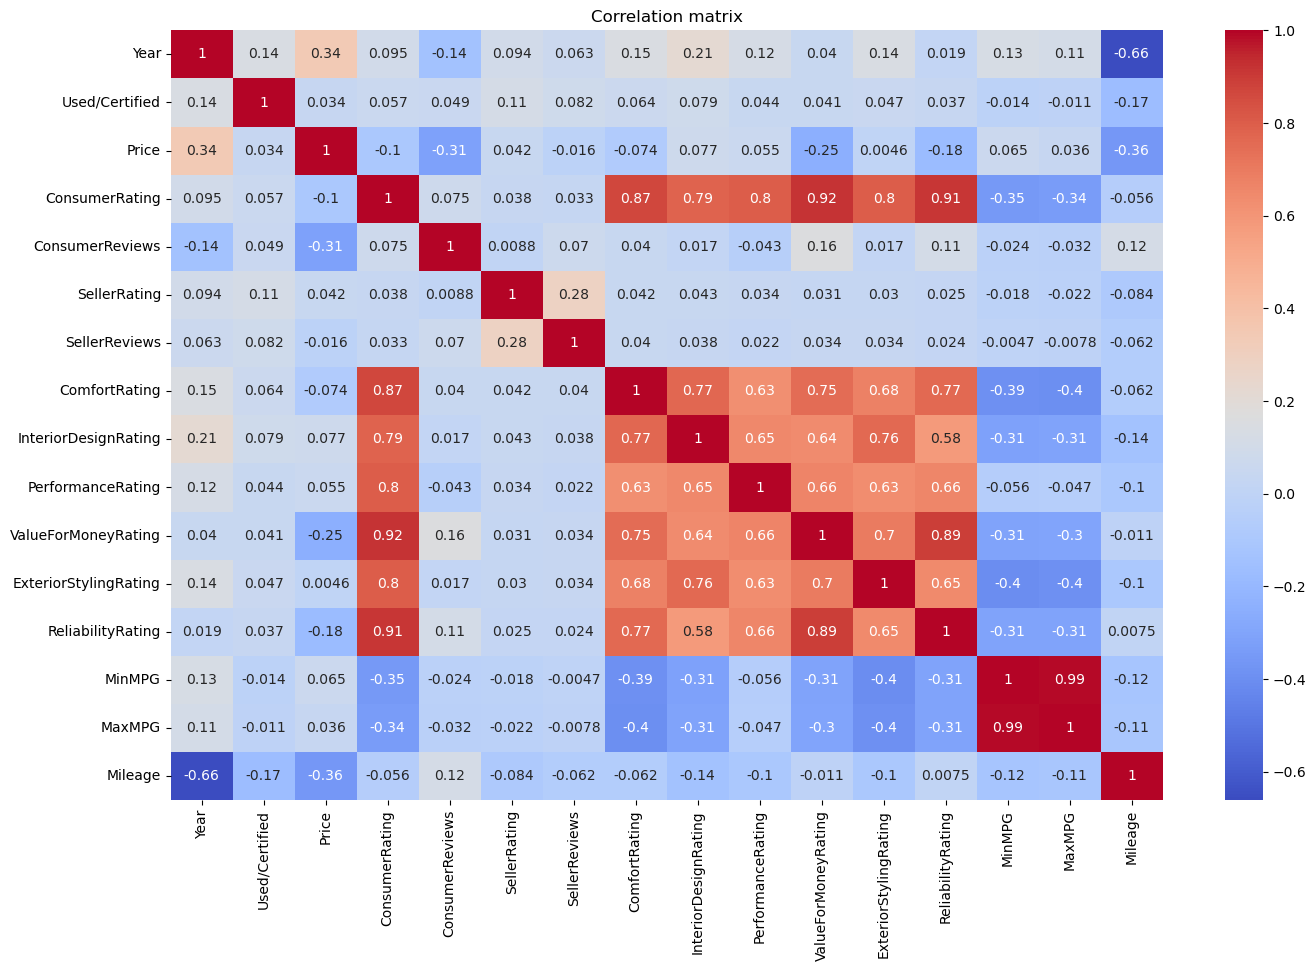

In [108]:
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize = (16 , 10))
sns.heatmap(corr_matrix , annot=True , cmap = 'coolwarm')
plt.title('Correlation matrix');

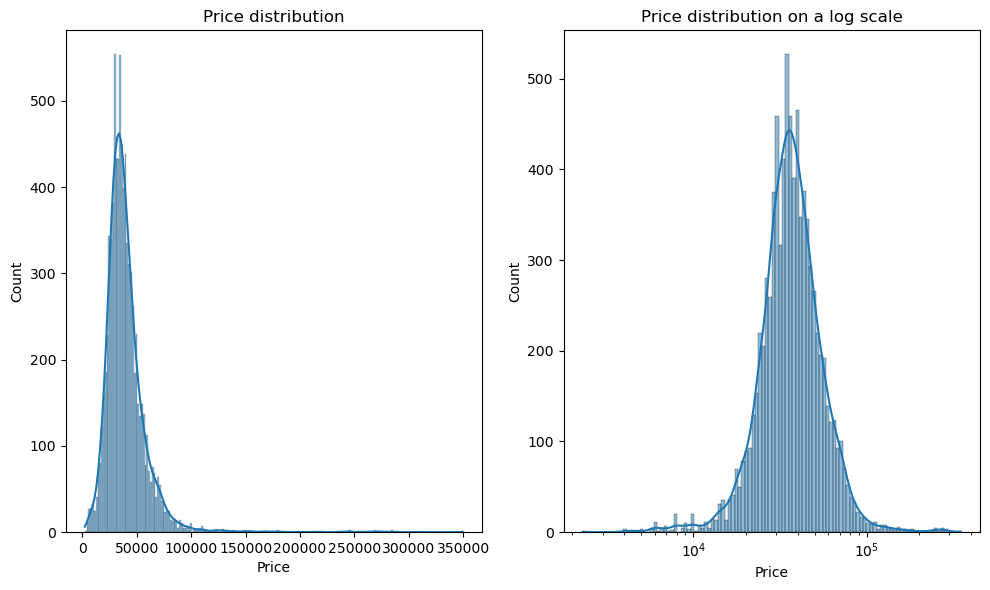

In [109]:
# most cars prices are between $10000 and $100000 

plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
sns.histplot(df['Price'],kde = True)
plt.title('Price distribution')

plt.subplot(1,2,2)
sns.histplot(df['Price'],kde = True,log_scale=True)
plt.title('Price distribution on a log scale')

plt.tight_layout();

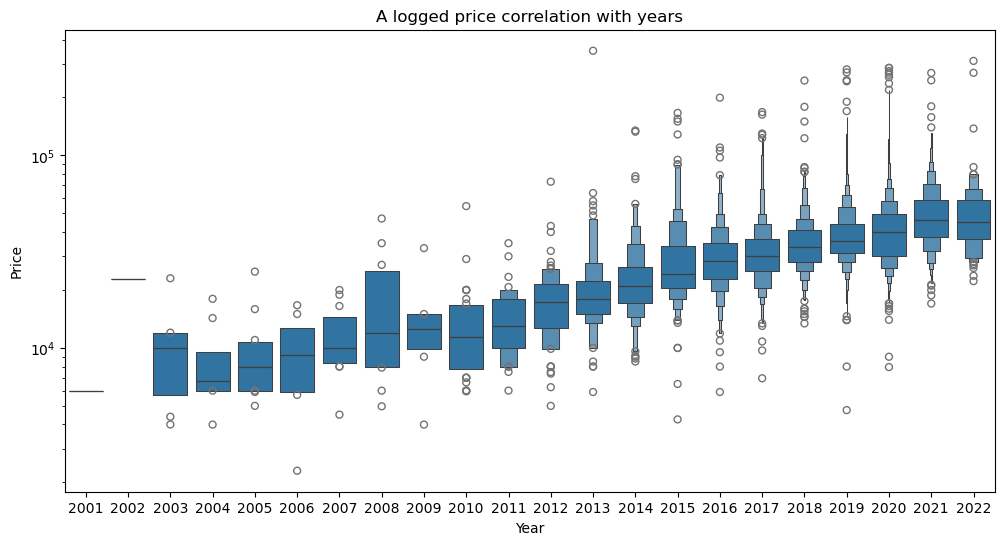

In [110]:
# prices are increasing over time
plt.figure(figsize=(12,6))

sns.boxenplot(y=df['Price'],x = df['Year']).set_yscale('log')
plt.title('A logged price correlation with years');

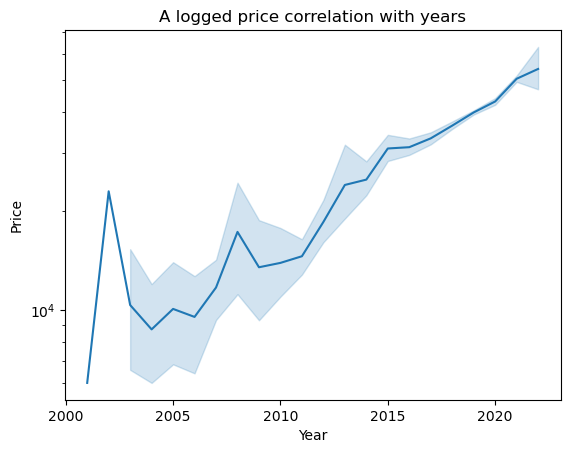

In [111]:
sns.lineplot(y=df['Price'],x = df['Year']).set_yscale('log')
plt.title('A logged price correlation with years');

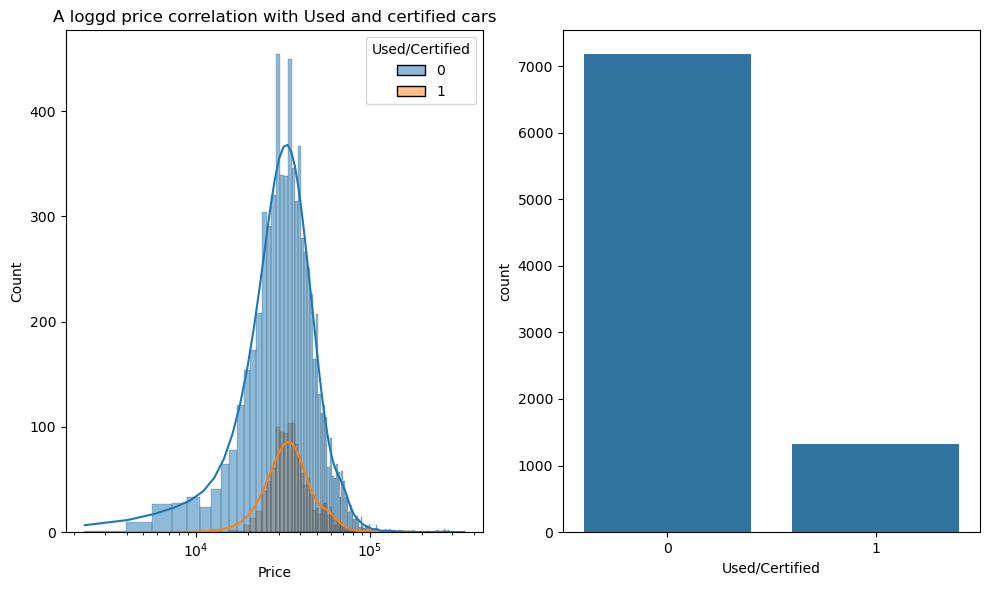

In [112]:
# most of the markes was used cars
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
sns.histplot(x=df['Price'],hue = df['Used/Certified'],kde=True ).set_xscale('log')
plt.title('A loggd price correlation with Used and certified cars')

plt.subplot(1,2,2)
sns.countplot(x=df['Used/Certified'])

plt.tight_layout();

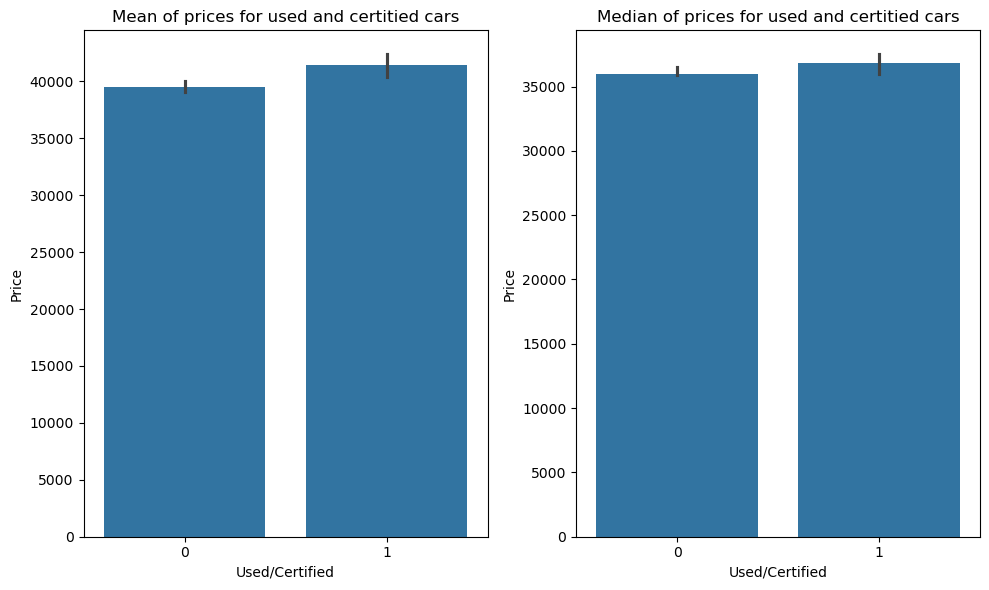

In [113]:
# certified cars are more expensive than used ones
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.barplot(x =df['Used/Certified'],y = df['Price'])
plt.title('Mean of prices for used and certitied cars')
plt.subplot(1,2,2)
sns.barplot(x =df['Used/Certified'],y = df['Price'] , estimator='median')
plt.title('Median of prices for used and certitied cars')
plt.tight_layout();

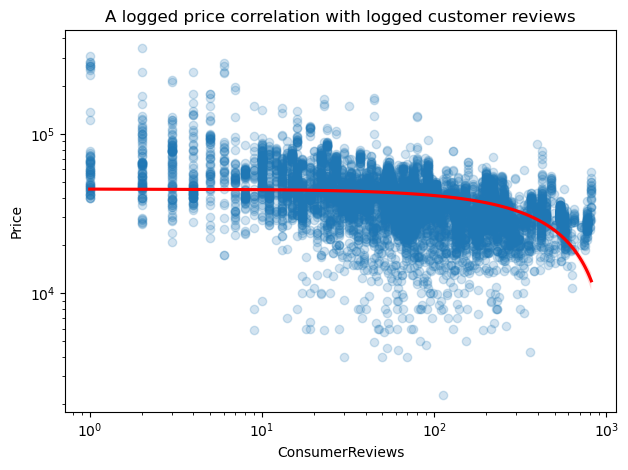

In [114]:
# the cheaper cars have more reviews in the most, because most people want cheap cars and not luxury

sns.regplot(x = df['ConsumerReviews'] , y =df['Price'],scatter_kws={'alpha':.2},line_kws={'color':'red'}).set(yscale = 'log',xscale = 'log')
plt.title('A logged price correlation with logged customer reviews');
plt.tight_layout();

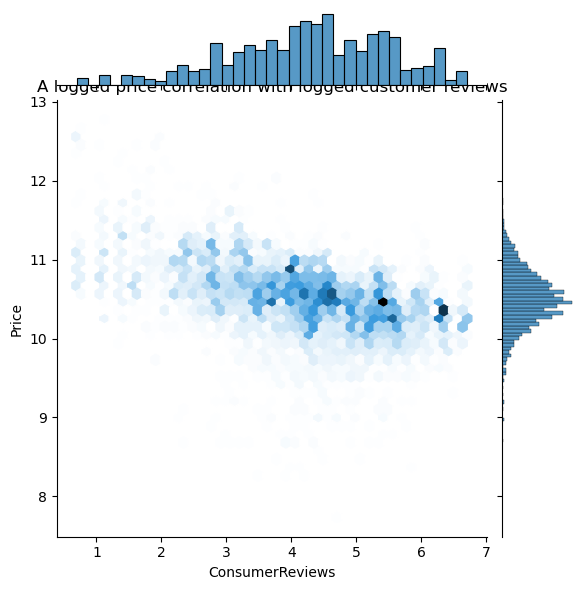

In [115]:
sns.jointplot(x =np.log1p( df['ConsumerReviews'] ), y =np.log1p(df['Price']) ,kind='hex');
plt.title('A logged price correlation with logged customer reviews');

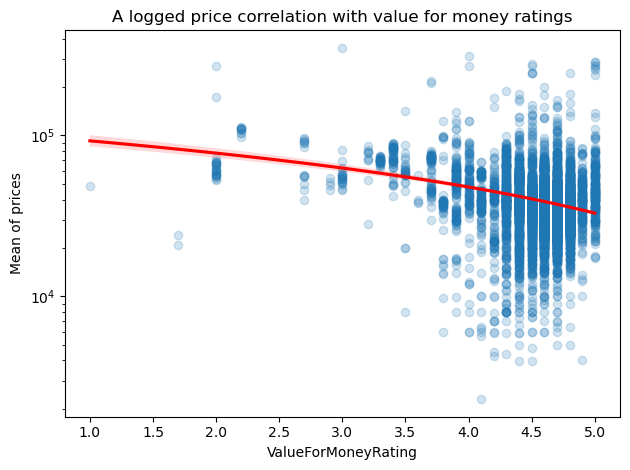

In [116]:
# cares with higher value for money rating has cheaper prices
sns.regplot(x= df['ValueForMoneyRating'] , y = df['Price'],scatter_kws={'alpha':.2},line_kws={'color':'red'}).set(yscale = 'log')
plt.ylabel('Mean of prices')
plt.title('A logged price correlation with value for money ratings')


plt.tight_layout();

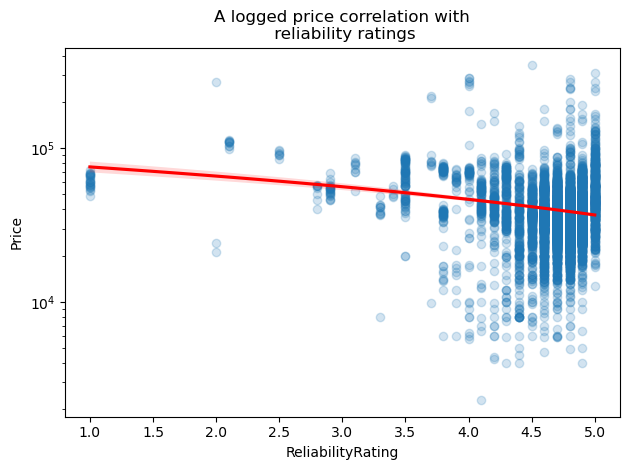

In [117]:
# cares with Reliability rating has cheaper prices (high performance cars are not reliable)
sns.regplot(x= df['ReliabilityRating'] , y = df['Price'],scatter_kws={'alpha':.2},line_kws={'color':'red'}).set(yscale = 'log')
plt.title('A logged price correlation with\n reliability ratings')

plt.tight_layout();

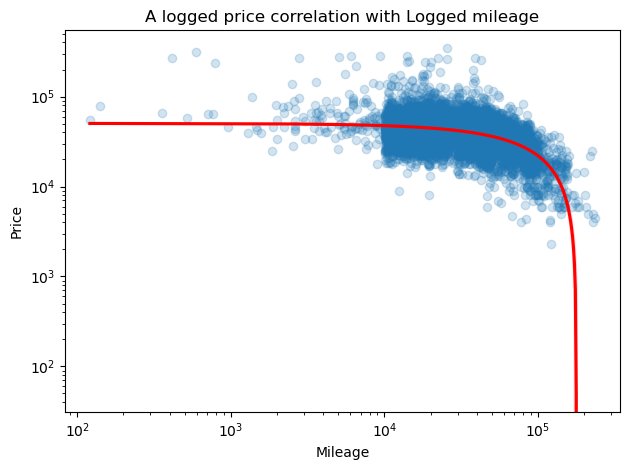

In [118]:
# cars prices decreases with mileage increaseing
sns.regplot(x= df['Mileage'] , y = df['Price'],scatter_kws={'alpha':.2},line_kws={'color':'red'}).set(yscale = 'log',xscale = 'log')
plt.title('A logged price correlation with Logged mileage')

plt.tight_layout();

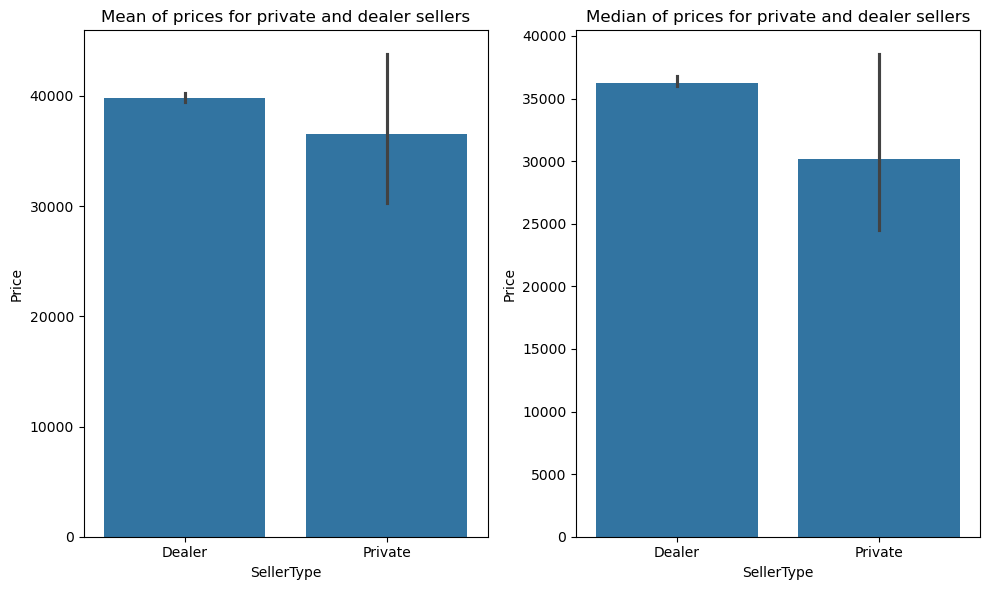

In [119]:
# Private Sellers has less prices than Dealer ones
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.barplot(x=df['SellerType'] , y = df['Price'])
plt.title('Mean of prices for private and dealer sellers')
plt.subplot(1,2,2)
sns.barplot(x=df['SellerType'] , y = df['Price'] , estimator=np.median)
plt.title('Median of prices for private and dealer sellers')
plt.tight_layout();

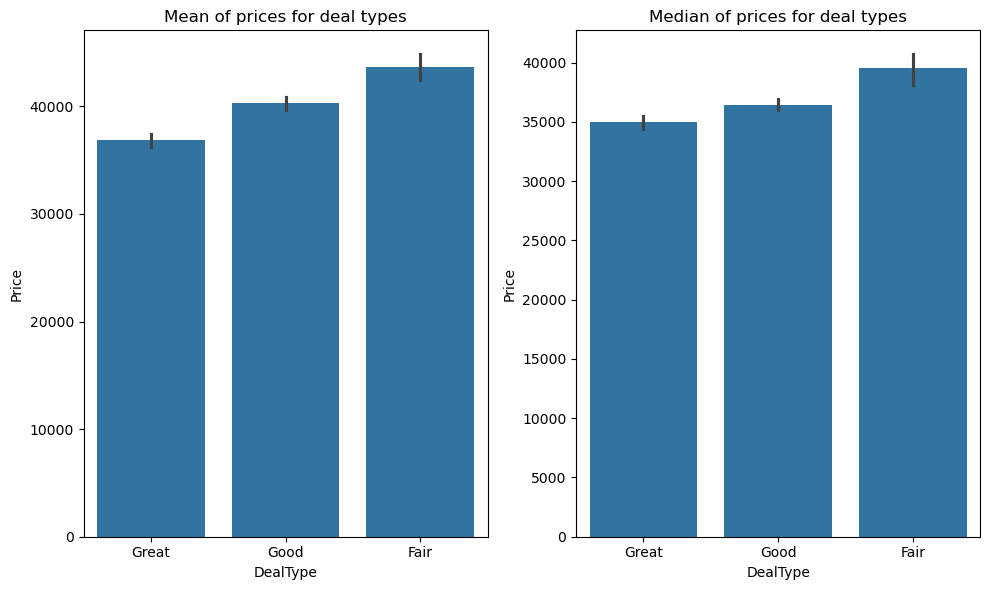

In [120]:
# the deal type is a measure for a car price among other same cars in the market, great deals means these cars have lower
#price among the average,the good for average price, the fair for slightly higher the average
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.barplot(x =df['DealType'] , y = df['Price'])
plt.title('Mean of prices for deal types')
plt.subplot(1,2,2)
sns.barplot(x =df['DealType'] , y = df['Price'],estimator=np.median)
plt.title('Median of prices for deal types')
plt.tight_layout();

In [121]:
df['Drivetrain'].value_counts()

Drivetrain
AWD    4042
FWD    2132
4WD    1463
RWD     864
Name: count, dtype: int64

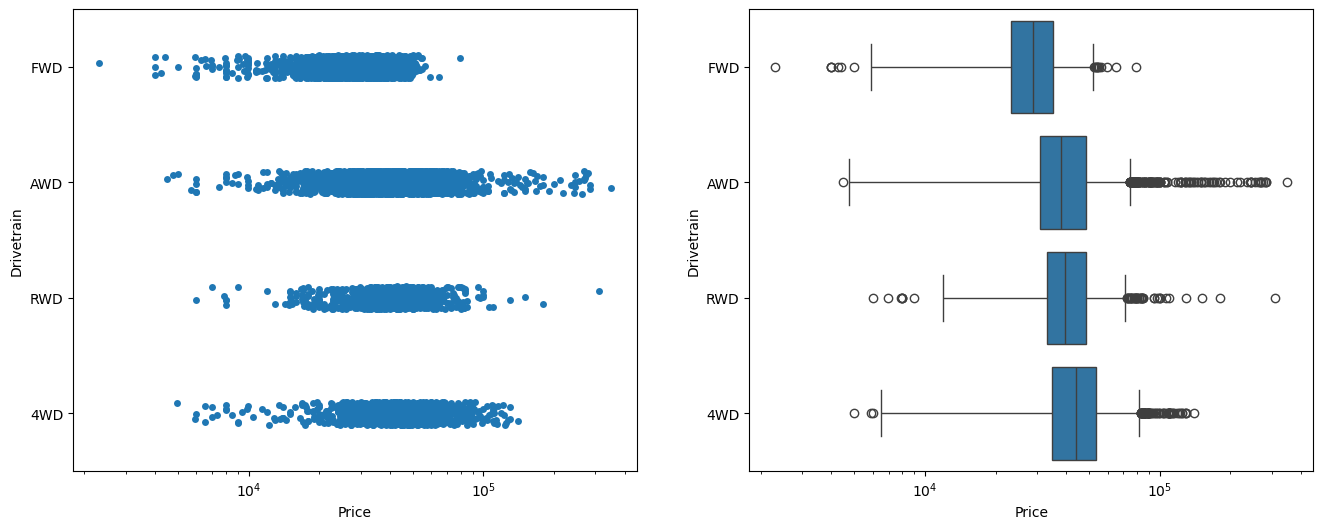

In [122]:
plt.figure(figsize=(16,6))
order_D = df.groupby(df['Drivetrain'])['Price'].median().sort_values().index
plt.subplot(1,2,1)
sns.stripplot(y = df['Drivetrain'] , x= df['Price'] ,order = order_D).set_xscale('log')
plt.subplot(1,2,2)
sns.boxplot(y = df['Drivetrain'] , x = df['Price'] , order = order_D).set_xscale('log')

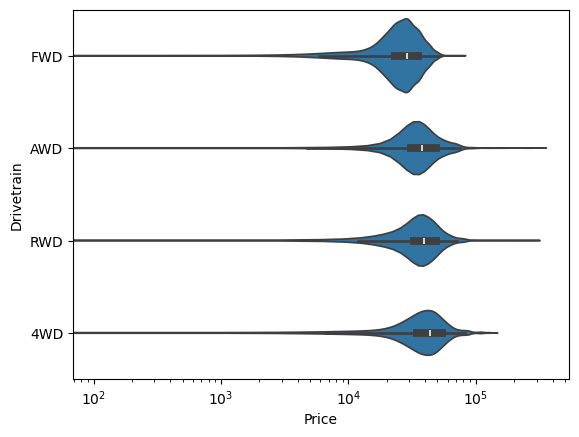

In [123]:
sns.violinplot(data=df, x='Price', y='Drivetrain',order=order_D).set_xscale('log')


In [124]:
#number of non-luxury cars are more than the number of luxury cars in AWD
df[df['Drivetrain'] == 'AWD'].groupby(['Make','Model'])['Price'].agg(['count','median']).sort_values(by='count', ascending=False).head(15)

,,count,median
Make,Model,,
BMW,X5 xDrive40i,144,55410.0
Honda,CR-V EX-L,126,32634.0
BMW,X3 xDrive30i,94,39998.0
Mercedes-Benz,GLC 300 Base 4MATIC,68,41998.0
Cadillac,XT5 Luxury,64,36398.5
Honda,CR-V EX,59,30474.0
Mercedes-Benz,C-Class C 300 4MATIC,58,37909.0
BMW,330 i xDrive,58,36994.5
Mercedes-Benz,GLE 350 Base 4MATIC,57,54988.0


In [125]:
# there are good number of luxury cars in RWD compare to non-luxury
df[df['Drivetrain'] == 'RWD'].groupby(['Make','Model'])['Price'].agg(['count','median']).sort_values(by='count', ascending=False).head(15)

count   median
Make          Model                                      
Mercedes-Benz C-Class C 300                   72  34845.5
BMW           330 i                           43  38750.0
              X3 sDrive30i                    39  39452.0
Jeep          Grand Cherokee Limited          36  32256.5
Mercedes-Benz E-Class E 350                   20  22100.0
              GLE 350 Base                    18  57444.0
Tesla         Model 3 Standard Range Plus     17  54992.0
Mercedes-Benz GLC 300 Base                    17  42888.0
BMW           540 i                           14  43204.5
Chevrolet     Tahoe LT                        13  58490.0
INFINITI      QX80 Luxe                       12  46827.0
Toyota        4Runner Limited                 12  45494.5
BMW           X5 sDrive40i                    12  56401.0
Mercedes-Benz E-Class E 300                   11  34998.0
Dodge         Charger Scat Pack               11  47500.0

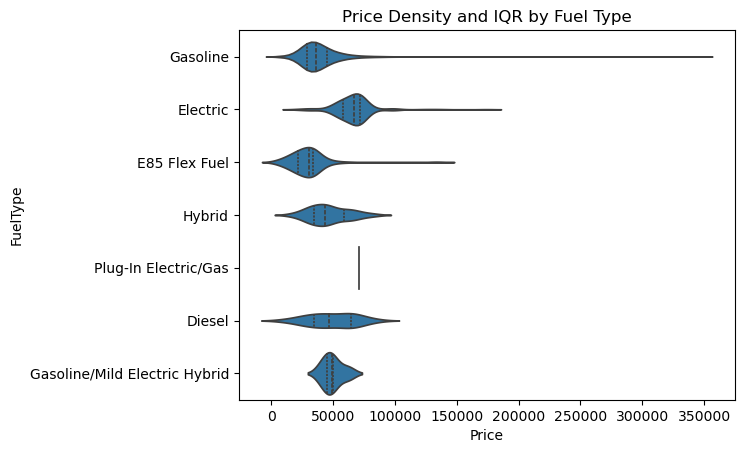

In [126]:
# for gasoline cars the most of them are below the median (economic cars) and good amount above the median (luxury) with highest prices
# for electric cars the most are little above the median (no cheap electric cars)
sns.violinplot(data=df, x='Price', y='FuelType' , inner = 'quartile')
plt.title('Price Density and IQR by Fuel Type');

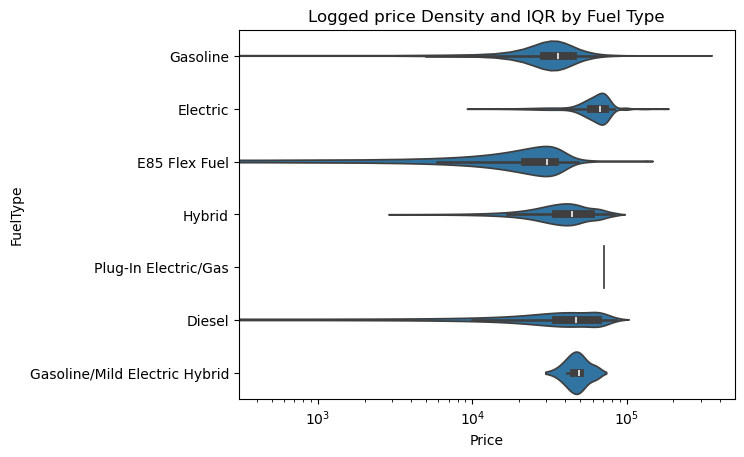

In [127]:
sns.violinplot(data=df, x='Price', y='FuelType').set_xscale('log')
plt.title('Logged price Density and IQR by Fuel Type');

In [128]:
df['FuelType'].value_counts()

FuelType
Gasoline                         8088
Electric                          185
E85 Flex Fuel                     116
Hybrid                             63
Diesel                             43
Gasoline/Mild Electric Hybrid       5
Plug-In Electric/Gas                1
Name: count, dtype: int64

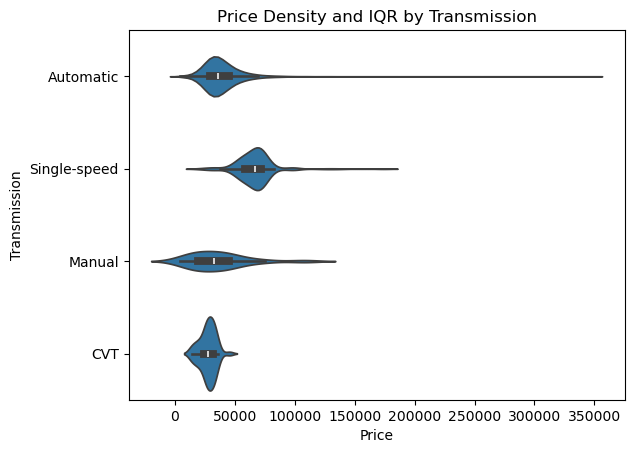

In [129]:
# this proves also the luxury and cheap cars in gasoline, and only luxury in electric
sns.violinplot(data=df, x='Price', y='Transmission' )
plt.title('Price Density and IQR by Transmission');

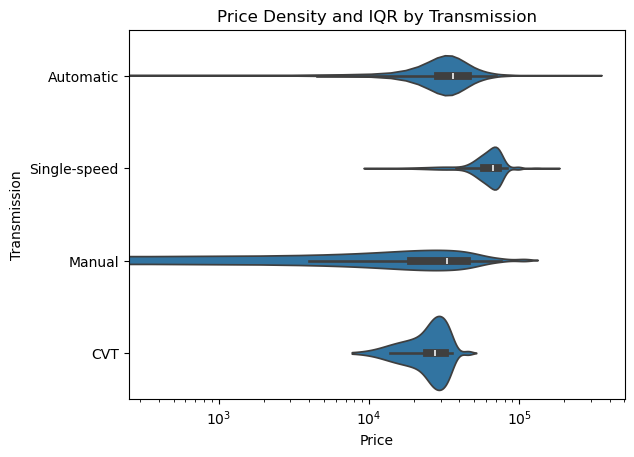

In [130]:
sns.violinplot(data=df, x='Price', y='Transmission' ).set_xscale('log')
plt.title('Price Density and IQR by Transmission');

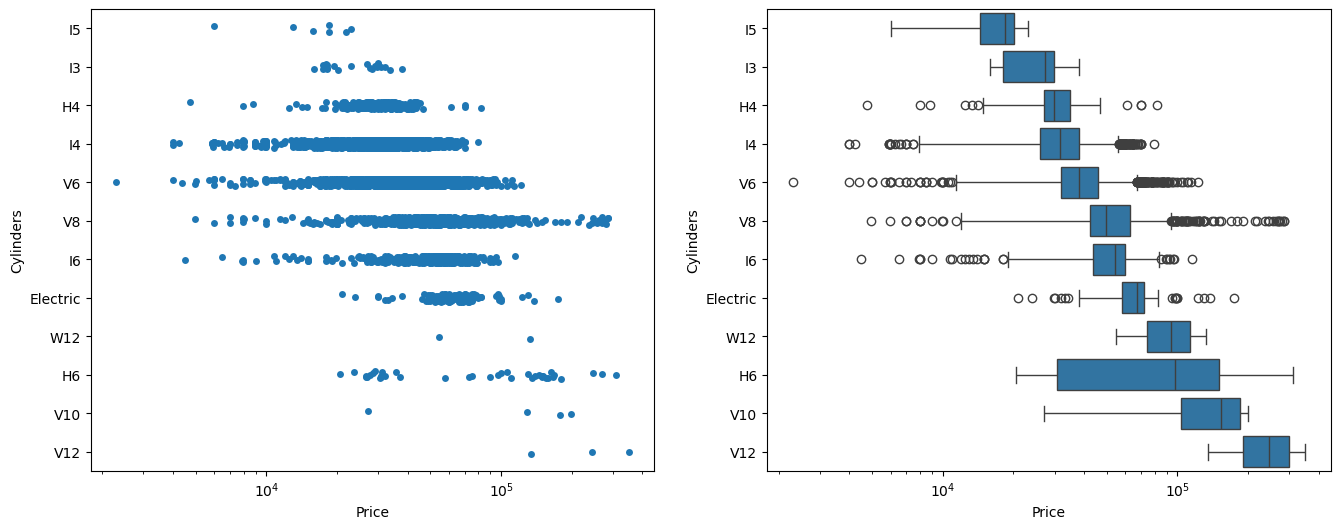

In [131]:
# for V10, V12 , W12 they are introduced in luxury cars only, V8 and V6 and H6 can be in cheap and luxury cars
#but electric cars in general have lower prices than the others luxuries including V8 
plt.figure(figsize=(16,6))
order_Cyl = df.groupby(df['Cylinders'])['Price'].median().sort_values().index
plt.subplot(1,2,1)
sns.stripplot(y = df['Cylinders'] , x= df['Price'] ,order = order_Cyl).set_xscale('log')
plt.subplot(1,2,2)
sns.boxplot(y = df['Cylinders'] , x = df['Price'] , order = order_Cyl).set_xscale('log')

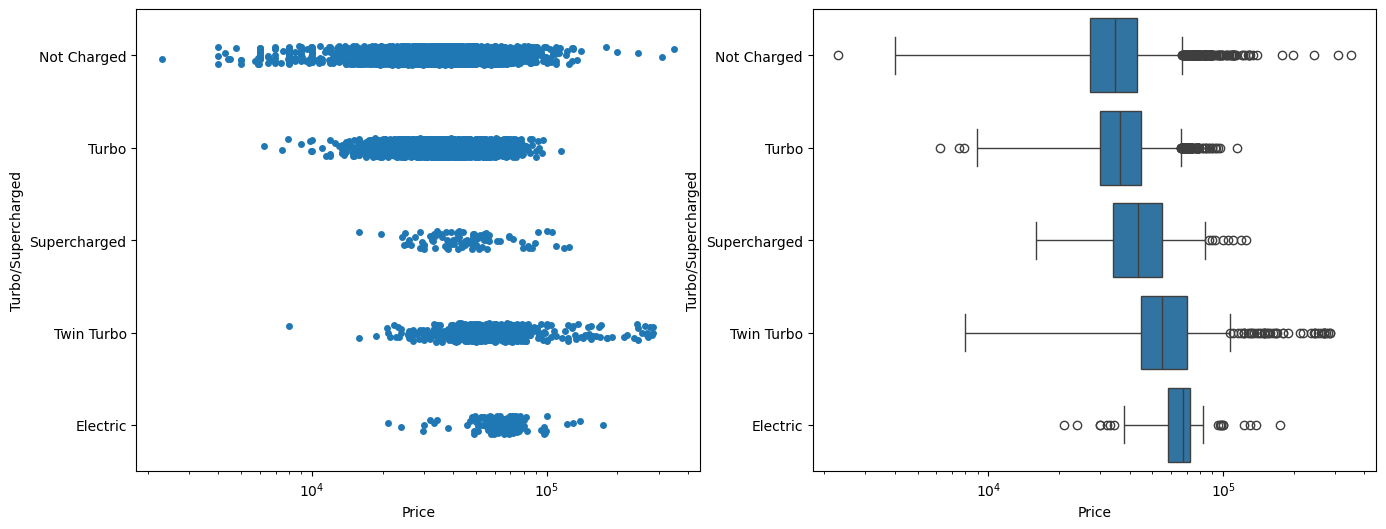

In [132]:
plt.figure(figsize=(16,6))
order_Cyl = df.groupby(df['Turbo/Supercharged'])['Price'].median().sort_values().index
plt.subplot(1,2,1)
sns.stripplot(y = df['Turbo/Supercharged'] , x= df['Price'] ,order = order_Cyl).set_xscale('log')
plt.subplot(1,2,2)
sns.boxplot(y = df['Turbo/Supercharged'] , x = df['Price'] , order = order_Cyl).set_xscale('log')

In [133]:
df[df['Turbo/Supercharged'] == 'Not Charged'].sort_values(by='Price').tail(10)

,Year,Make,Model,Used/Certified,Price,ConsumerRating,ConsumerReviews,SellerType,SellerName,SellerRating,SellerReviews,StreetName,State,Zipcode,DealType,ComfortRating,InteriorDesignRating,PerformanceRating,ValueForMoneyRating,ExteriorStylingRating,ReliabilityRating,ExteriorColor,InteriorColor,Drivetrain,MinMPG,MaxMPG,FuelType,Transmission,Engine,VIN,Stock#,Mileage,Cylinders,Turbo/Supercharged
8809,2015,Audi,R8 5.2,0,128550,4.7,7,Dealer,McLaren Philadelphia,4.6,9,1631 W Chester Pike West Chester,PA,19382,Good,4.4,4.6,4.9,4.6,5.0,5.0,Suzuka Gray Metallic/Black Roof,Black,AWD,13.0,22.0,Gasoline,Automatic,5.2L V10 40V GDI DOHC,WUAVNAFG0F7001234,F7001234,23090,V10,Not Charged
4961,2020,Land,Rover Range Rover P525 HSE LWB,0,129495,4.7,5,Dealer,Wilde Jaguar Land Rover Sarasota,4.9,3926,4821 Clark Rd Sarasota,FL,34233,Good,4.8,4.6,4.4,4.4,5.0,4.8,Portofino Blue,Ivory,4WD,16.0,21.0,Gasoline,Automatic,V8,SALGS5SE8LA414195,JP11998,15796,V8,Not Charged
7529,2021,Ford,F-150 Lariat,0,129991,4.8,79,Dealer,Hurst Autoplex Mitsubishi,4.9,367,240 Northeast Loop 820 Hurst,TX,76053,Good,4.8,4.9,4.8,4.6,4.9,4.7,Agate Black Metallic,Black,4WD,19.0,24.0,Gasoline,Automatic,5.0L V8 32V PDI DOHC,1FTFW1E50MFB32116,8145,12284,V8,Not Charged
5422,2014,Bentley,Continental GT Speed,0,134664,4.8,4,Dealer,Braman Bentley Palm Beach,4.8,23,2801 Okeechobee Blvd West Palm Beach,FL,33409,Good,4.5,4.8,5.0,4.5,5.0,4.7,Ghost White 3 Coat Pearlescent,Linen,AWD,12.0,21.0,E85 Flex Fuel,Automatic,12 Cylinder Engine,SCBFC7ZA1EC087390,RU-P28913C,11025,V12,Not Charged
483,2019,Land,Rover Range Rover SV Autobiography Dynamic,0,140000,4.5,16,Dealer,Wood Nissan of Kansas City,4.7,114,1025 Southeast Oldham Parkway Lee's Summit,MO,64081,Good,4.7,4.6,4.5,3.9,4.5,4.4,SVO White,Ebony / Cirrus,4WD,14.0,19.0,Gasoline,Automatic,V8,SALGW2SEXKA538342,LNA1305,37601,V8,Not Charged
6271,2018,Audi,R8 5.2 quattro Plus,0,178895,4.9,5,Dealer,Gold Coast Maserati - Alfa Romeo,4.9,329,732 Northern Blvd Great Neck,NY,11021,Good,4.8,5.0,5.0,4.6,5.0,4.8,Mythos Black Metallic w/ Black Roof,Black / Express Red,AWD,14.0,22.0,Gasoline,Automatic,5.2L V10 40V PDI DOHC,WUA4BCFX2J7900296,GP1132,17919,V10,Not Charged
8990,2016,Lamborghini,Huracan LP610-4,0,199500,4.8,7,Dealer,AE of Miami,3.5,63,5700 NW 27th Ave Miami,FL,33142,Good,4.4,4.9,5.0,4.6,4.7,4.8,Gray,Nero Ade,AWD,14.0,21.0,Gasoline,Automatic,5.2L V10 40V GDI DOHC,ZHWUC1ZF1GLA04146,A04146,37674,V10,Not Charged
6030,2018,Ferrari,GTC4Lusso V12,1,244900,5.0,2,Dealer,Continental Ferrari,4.3,12,420 E. Ogden Ave. Hinsdale,IL,60521,Good,5.0,5.0,5.0,4.5,5.0,5.0,Grigio Scuro,Cuoio,AWD,12.0,17.0,Gasoline,Automatic,6.3L V12 48V GDI DOHC,ZFF82WNA0J0232067,696671,20096,V12,Not Charged
2181,2022,Porsche,911 GT3,0,309888,4.9,1,Dealer,Mark Motors,5.0,3,140 Enterprise Pkwy Boerne,TX,78006,Good,5.0,5.0,5.0,4.0,5.0,5.0,Chalk,Black,RWD,15.0,18.0,Gasoline,Automatic,4.0L H6 24V GDI DOHC,WP0AC2A91NS269382,P269382,597,H6,Not Charged
1626,2013,Lamborghini,Aventador LP700-4,0,349995,4.6,2,Dealer,RP Exotics,5.0,3,1155 Warson N Road Saint Louis,MO,63132,Good,4.5,5.0,5.0,3.0,5.0,4.5,–,–,AWD,10.0,16.0,Gasoline,Automatic,6.5L V12 48V MPFI DOHC,ZHWUR1ZD7DLA01518,A01518,25658,V12,Not Charged


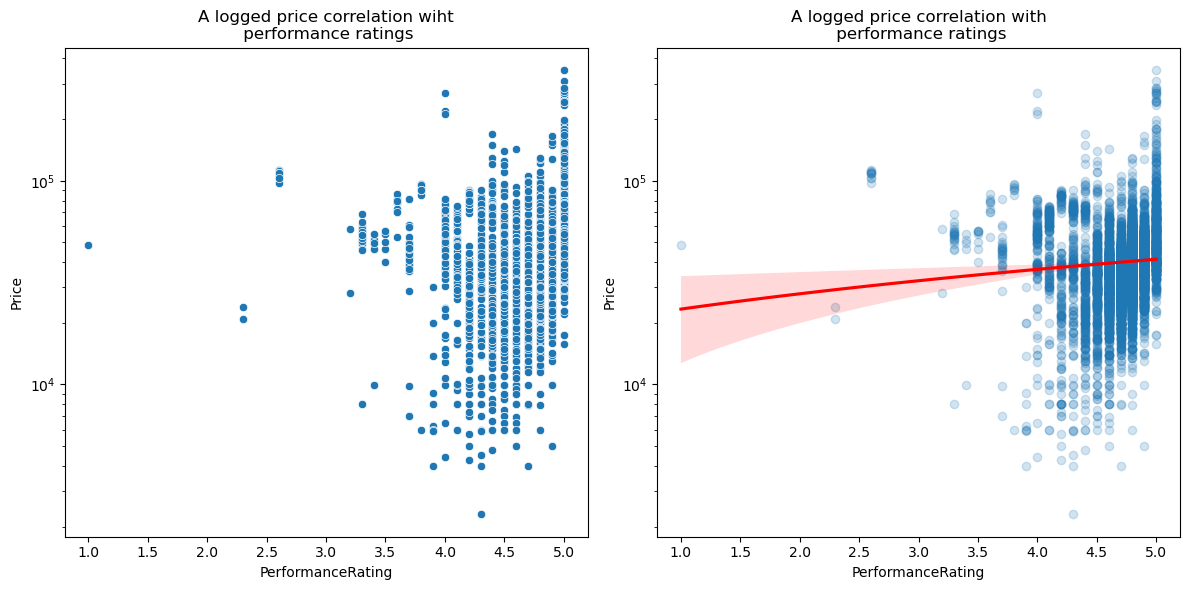

In [134]:
# higher performance cars have more prices
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.scatterplot(x =df['PerformanceRating'] , y = df['Price']).set_yscale('log')
plt.title('A logged price correlation wiht\n performance ratings')
plt.subplot(1,2,2)
sns.regplot(x= df['PerformanceRating'] , y = df['Price'],scatter_kws={'alpha':.2},line_kws={'color':'red'}).set(yscale = 'log')
plt.title('A logged price correlation with\n performance ratings')

plt.tight_layout();

In [135]:
df.groupby(['Make'])['Price'].median().sort_values(ascending=False)

Make
Lamborghini      269499.0
Ferrari          244900.0
Bentley          134664.0
Tesla             67995.0
Porsche           62998.0
Land              55995.0
RAM               49985.5
Maserati          48578.5
Genesis           46300.0
Jaguar            44900.0
GMC               43999.0
Lexus             43631.0
Audi              42591.0
Mercedes-Benz     41989.0
BMW               41985.0
Volvo             41000.0
Lincoln           40965.0
Cadillac          37500.0
Acura             37474.0
Dodge             37239.0
INFINITI          35738.0
Alfa              34990.0
Chevrolet         34989.0
Jeep              34499.5
Honda             32000.0
Toyota            31998.0
Ford              31883.0
Volkswagen        29876.0
Mazda             29534.5
Subaru            29499.5
Chrysler          27743.0
Hyundai           27593.5
Nissan            26973.0
Kia               26655.0
Buick             25464.5
Mitsubishi        21739.0
MINI              18213.0
FIAT               9900.0
Saturn 

In [136]:
df.groupby(['Make','Cylinders', 'Transmission'])['Price'].median().sort_values(ascending=False)

Make           Cylinders  Transmission
Lamborghini    V12        Automatic       349995.0
               V8         Automatic       269499.0
Bentley        V8         Automatic       252420.5
Ferrari        V12        Automatic       244900.0
Lamborghini    V10        Automatic       199500.0
Audi           V10        Automatic       153722.5
Porsche        H6         Automatic       149993.0
Bentley        V12        Automatic       134664.0
Porsche        Electric   Single-speed    129990.0
Land           I6         Automatic       115000.0
Porsche        H6         Manual          105899.0
Bentley        W12        Automatic        93716.5
Land           V8         Automatic        82871.5
Mercedes-Benz  I6         Automatic        75913.5
Porsche        H4         Automatic        69945.0
BMW            V8         Automatic        69939.0
Jaguar         V8         Automatic        68995.0
Tesla          Electric   Single-speed     67995.0
Mercedes-Benz  V8         Automatic        